In [374]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, GaussianNoise
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers import MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D, Conv2DTranspose, Cropping2D
from keras.models import Sequential, Model
from keras.optimizers import Adam, rmsprop
from keras import losses
from keras.layers import MaxPooling2D, concatenate, Add
from keras.utils import to_categorical
import keras.backend as K

import matplotlib.pyplot as plt

import numpy as np

import os
import shutil

import joblib

patch_size = 128

category = True

import imgaug
import keras.utils

import numpy as np
import keras

from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, GaussianNoise
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers import MaxPooling2D, Lambda
from keras.layers.convolutional import UpSampling2D, Conv2D, Conv2DTranspose, Cropping2D
from keras.models import Sequential, Model
from keras.layers import MaxPooling2D, concatenate, Add
import keras.backend as K


import keras.utils
from keras.engine.topology import Layer

def nvidia_unet(patch_size=128):
    input_ = Input((patch_size, patch_size, 3))
    skips = []
    output = input_
    for shape, filters in zip([5, 3, 3, 3, 3, 3, 3], [16, 32, 64, 64, 64, 64, 64]):
        skips.append(output)
        print(output.shape)
        output= Conv2D(filters // 3, (shape, shape), strides=2, padding="same", activation="relu")(output)
        #output = BatchNormalization()(output)
        #if shape != 7:
        #   output = BatchNormalization()(output)
    for shape, filters in zip([4, 4, 4, 4, 4, 4, 4, 4], [64, 64, 64, 64,32, 16, 2]):
        output = keras.layers.UpSampling2D()(output)
        
        skip_output = skips.pop()
        output = concatenate([output, skip_output], axis=3)
        
        if filters != 2:
            activation = "relu"
        else:
            activation = "softmax"
        output = Conv2D(filters // 3 if filters != 2 else 2, (shape, shape), activation=activation, padding="same")(output)
        
        
            
        if filters != 2:
            output = BatchNormalization(momentum=.9)(output)
    assert len(skips) == 0
    return Model([input_], [output])
models = [nvidia_unet() for _ in range(6)]
[model.compile(optimizer=keras.optimizers.adam(), loss= "mean_squared_error") for model in models]
loss = [[] for _ in range(6)]

(?, 128, 128, 3)
(?, 64, 64, 5)
(?, 32, 32, 10)
(?, 16, 16, 21)
(?, 8, 8, 21)
(?, 4, 4, 21)
(?, 2, 2, 21)
(?, 128, 128, 3)
(?, 64, 64, 5)
(?, 32, 32, 10)
(?, 16, 16, 21)
(?, 8, 8, 21)
(?, 4, 4, 21)
(?, 2, 2, 21)
(?, 128, 128, 3)
(?, 64, 64, 5)
(?, 32, 32, 10)
(?, 16, 16, 21)
(?, 8, 8, 21)
(?, 4, 4, 21)
(?, 2, 2, 21)
(?, 128, 128, 3)
(?, 64, 64, 5)
(?, 32, 32, 10)
(?, 16, 16, 21)
(?, 8, 8, 21)
(?, 4, 4, 21)
(?, 2, 2, 21)
(?, 128, 128, 3)
(?, 64, 64, 5)
(?, 32, 32, 10)
(?, 16, 16, 21)
(?, 8, 8, 21)
(?, 4, 4, 21)
(?, 2, 2, 21)
(?, 128, 128, 3)
(?, 64, 64, 5)
(?, 32, 32, 10)
(?, 16, 16, 21)
(?, 8, 8, 21)
(?, 4, 4, 21)
(?, 2, 2, 21)


In [50]:
import cv2
import random
from PIL import Image
web_images_Dir = "../../webgrid/image_uploads/"
web_static_pictures = os.listdir(web_images_Dir)[1:]

def true_random_web_image():
    p = random.choice(web_static_pictures)
    return np.rot90(np.array(Image.open(web_images_Dir + p)), 3)
#oldmodel = keras.models.load_model("../web_linefinder")
for _ in range(2):
    try:
        imgs = [true_random_web_image()[::4, ::4] for _ in range(120)]
        inputs = []
        outputs = []
        for img in imgs:
            #i, o = segment3_getblocks4train(img)
            
            i = img[ :, :, :3]
            #print(i.shape)
            i = i.reshape(1, 128, 128, 3)
            i = np.concatenate([i, np.flip(i, 1)])
            i = np.concatenate([i, np.flip(i, 2)])
            #print(i.shape)
            o = oldmodel.predict(i / 255.)
            #print(o.shape)
            
            #print(o.shape)
            scale = np.random.uniform(-1.4, 1.4, (i.shape[0], 1, 1, 1))


            inputs.append((i / 255.) ** ( 2.5 **scale))
            outputs.append(o)
        inputs = np.concatenate(inputs)
        outputs = np.concatenate(outputs)
        #model.fit(inputs, outputs)
    except OSError as e:
        print(e)
    finally:
        if type(inputs) is list:
            inputs = np.concatenate(inputs)
            outputs = np.concatenate(outputs)

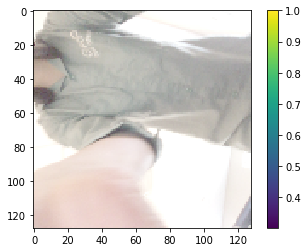

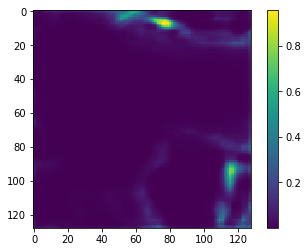

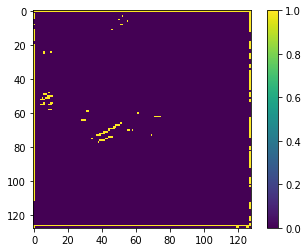

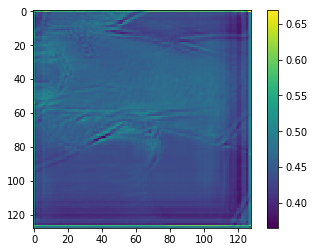

In [189]:
i = np.random.randint(230)
plt.imshow(inputs[i, :, :])
plt.colorbar()
plt.show()
plt.imshow(outputs[i, :, :, 0])
plt.colorbar()
plt.show()
plt.imshow(1.0 * (model.predict(inputs[i:i+1])[0, :, :, 0] > .5))
plt.colorbar()
plt.show()
plt.imshow(1.0 * (model.predict(inputs[i:i+1])[0, :, :, 0]))
plt.colorbar()
plt.show()

In [58]:
from PIL import Image
import numpy as np
import os
pictures = {name: np.array(Image.open("../manual_segmentations/"+name)) for name in os.listdir("../manual_segmentations/")}
pictures = np.array(list(pictures.values()))

In [303]:
def dialateStack(array, iterations):
    return np.array([scipy.ndimage.binary_dilation(y_e, iterations=iterations) for y_e in array])


from PIL import Image
import numpy as np
import os
testpictures = {name: np.array(Image.open("../test_set/manual_segmentations/"+name)) for name in os.listdir("../test_set/manual_segmentations/")}
testpictures = np.array(list(testpictures.values()))

testdata = testpictures[:, ::2, ::2, :3] / 255.
testclasses = 1 - testpictures[:, :, :, 3:] / 255
width = 14
test_y_edge = dialateStack(testclasses, width)[:, ::2, ::2] * 1.0

t_final_x = []
t_final_y = []
for i in range(len(testdata)):

    
    t_final_x.append(cv2.resize(testdata[i], (128, 128)))
    t_final_y.append(cv2.resize(test_y_edge[i], (128, 128)))
testdata_ready = np.array(t_final_x)
testclasses_ready = np.array(t_final_y)

testclasses_ready = np.expand_dims(testclasses_ready, -1)
testclasses_ready = np.concatenate([testclasses_ready, 1-testclasses_ready], -1)


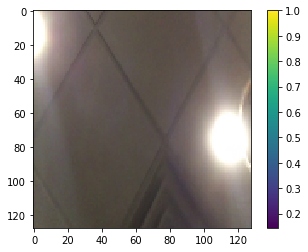

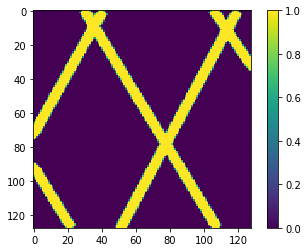

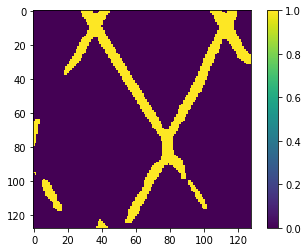

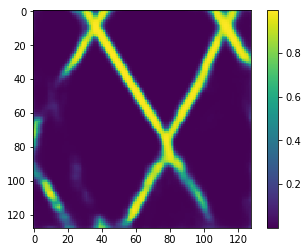

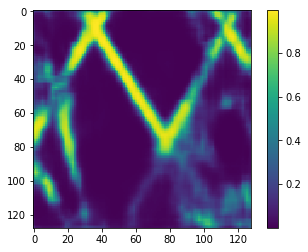

0.06430092


In [451]:
for j in [5]:
    modelt = umodel
    #testdata_ready *= 255
    i = np.random.randint(len(testdata_ready))
    plt.imshow(testdata_ready[i, :, :])
    plt.colorbar()
    plt.show()
    plt.imshow(testclasses_ready[i, :, :, 0])
    plt.colorbar()
    plt.show()
    plt.imshow(1.0 * (modelt.predict(testdata_ready[i:i+1]).reshape((-1, 128, 128, 2))[0, :, :, 0] > .5))
    plt.colorbar()
    plt.show()
    plt.imshow(1.0 * (modelt.predict(testdata_ready[i:i+1]).reshape((-1, 128, 128, 2))[0, :, :, 0]))
    plt.colorbar()
    plt.show()
    plt.imshow(1.0 * (models[5].predict(testdata_ready[i:i+1]).reshape((-1, 128, 128, 2))[0, :, :, 0]))
    plt.colorbar()
    plt.show()
    out = model.predict(testdata_ready) > .5 

    print(modelt.test_on_batch(testdata_ready, testclasses_ready))

    np.mean((out - testclasses_ready)**2)

In [21]:

data = pictures[:, ::2, ::2, :3] / 255.
classes = 1 - pictures[:, :, :, 3:] / 255

In [115]:
model.test_on_batch(testdata_ready, testclasses_ready)

0.087405376

In [22]:
import scipy.ndimage

In [3]:
model = keras.models.load_model("../web_linefinder")

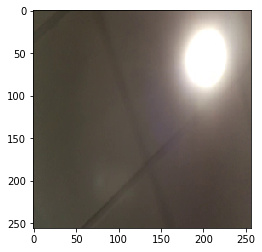

NameError: name 'y_edge' is not defined

In [23]:
plt.imshow(data[97])
plt.show()
plt.imshow(y_edge[97])
plt.show()

In [399]:
import scipy
import cv2
import matplotlib.pyplot as plt
for width in [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]:
    #y_edge = np.logical_or(y[:, 2:, 1:-1] != y[:, :-2, 1:-1], 0)
    y_edge = np.array([scipy.ndimage.binary_dilation(y_e, iterations=width) for y_e in classes])[:, ::2, ::2] * 1.0
    for _ in range(700):
        #augment by rotation
        print("rotation")
        angle = np.random.randint(360)
        
        batchx = scipy.ndimage.interpolation.rotate(data, angle, (1, 2), False, mode="constant", cval=0)
        batchy = scipy.ndimage.interpolation.rotate(y_edge, angle, (1, 2), False, mode="constant", cval=-1)
        
        

        
      
        #batchx = np.concatenate([batchx, -batchx]) / 255.

        print("scaling")
        maxcrop = 90
        shape = batchx[0].shape
        
        final_x = []
        final_y = []
        for i in range(len(batchx)):
            
            while True:
                
                x1 = np.random.randint(0, maxcrop)
                x2 = np.random.randint(256 - maxcrop, 256)

                y1 = np.random.randint(0, maxcrop)
                y2 = np.random.randint(256 - maxcrop, 256)
                
                

                y_test = batchy[i, x1:x2, y1:y2]

                if not(np.any(y_test == -1)):
                    break
            
            final_x.append(cv2.resize(batchx[i, x1:x2:2, y1:y2:2], (128, 128)))
            final_y.append(cv2.resize(batchy[i, x1:x2:2, y1:y2:2], (128, 128)))
            
        print("duplicating")
        
        
        batchx = np.array(final_x)
        batchy = np.array(final_y)
        
        batchy = np.expand_dims(batchy, -1)
        batchy = np.concatenate([batchy, 1-batchy], -1)
        
        batchx = np.concatenate([batchx, np.flip(batchx, 2)])
        batchy = np.concatenate([batchy, np.flip(batchy, 2)])
        
        batchx = np.concatenate([batchx, np.flip(batchx, 1)])
        batchy = np.concatenate([batchy, np.flip(batchy, 1)])
        
        batchx = np.concatenate([batchx, np.transpose(batchx, (0, 2, 1, 3))])
        batchy = np.concatenate([batchy, np.transpose(batchy, (0, 2, 1, 3))])
        
        offset = np.random.random((len(batchx), 1, 1, 1)) / 4 - .125
        scale = np.random.random((len(batchx), 1, 1, 1)) / 2 + .75
 
        batchx = scale * batchx + offset
        
    
        
        for i in range(6):
            l = models[i].fit(batchx, batchy, validation_data=(testdata_ready, testclasses_ready), batch_size=len(batchx) // 12)
            loss[i].append(l)
        

rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0434 - val_loss: 0.0862
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0418 - val_loss: 0.0768
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0428 - val_loss: 0.0805
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0504 - val_loss: 0.0879
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0447 - val_loss: 0.0827
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0431 - val_loss: 0.0812
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.

1440/1440 [==============================] - 1s - loss: 0.0501 - val_loss: 0.0876
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0441 - val_loss: 0.0850
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0420 - val_loss: 0.0816
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0409 - val_loss: 0.0855
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0391 - val_loss: 0.0791
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0397 - val_loss: 0.0833
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0484 - val_loss: 0.0852
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0406 - val_loss: 0.0838
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0388 - val_loss: 0.0750
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0407 - val_loss: 0.0793
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0490 - val_loss: 0.0910
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0444 - val_loss: 0.0871
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0412 - val_loss: 0.0884
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0407 - val_loss: 0.0838
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0497 - val_loss: 0.0861
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0435 - val_loss: 0.0839
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0423 - val_loss: 0.0805
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0415 - val_loss: 0.0851
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0395 - val_loss: 0.0774
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0411 - val_loss: 0.0784
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0489 - val_loss: 0.0843
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0418 - val_loss: 0.0817
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0397 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0404 - val_loss: 0.0787
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0483 - val_loss: 0.0861
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0428 - val_loss: 0.0820
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0409 - val_loss: 0.0828
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0428 - val_loss: 0.0845
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0464 - val_loss: 0.0914
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0416 - val_loss: 0.0861
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0390 - val_loss: 0.0826
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0421 - val_loss: 0.0793
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0402 - val_loss: 0.0760
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0414 - val_loss: 0.0777
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0492 - val_loss: 0.0848
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0396 - val_loss: 0.0825
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0367 - val_loss: 0.0778
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0386 - val_loss: 0.0808
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0463 - val_loss: 0.0823
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0408 - val_loss: 0.0883
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0384 - val_loss: 0.0810
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0404 - val_loss: 0.0846
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0483 - val_loss: 0.0937
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0393 - val_loss: 0.0836
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0379 - val_loss: 0.0849
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0378 - val_loss: 0.0865
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0364 - val_loss: 0.0790
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0377 - val_loss: 0.0811
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0486 - val_loss: 0.0854
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0361 - val_loss: 0.0816
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0341 - val_loss: 0.0767
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0355 - val_loss: 0.0825
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0433 - val_loss: 0.0891
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0393 - val_loss: 0.0887
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0360 - val_loss: 0.0828
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0367 - val_loss: 0.0836
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0458 - val_loss: 0.0900
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0406 - val_loss: 0.0896
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0379 - val_loss: 0.0782
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0397 - val_loss: 0.0810
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0373 - val_loss: 0.0774
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0381 - val_loss: 0.0811
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0465 - val_loss: 0.0852
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0672 - val_loss: 0.1230
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0349 - val_loss: 0.0789
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0350 - val_loss: 0.0810
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0424 - val_loss: 0.0899
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0376 - val_loss: 0.0895
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0359 - val_loss: 0.0822
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0609 - val_loss: 0.1150
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0447 - val_loss: 0.0859
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0395 - val_loss: 0.0794
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0380 - val_loss: 0.0852
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0461 - val_loss: 0.0789
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0389 - val_loss: 0.0769
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0392 - val_loss: 0.0753
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0466 - val_loss: 0.0802
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0388 - val_loss: 0.0867
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0343 - val_loss: 0.0772
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0346 - val_loss: 0.0779
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0420 - val_loss: 0.0833
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0374 - val_loss: 0.0822
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0356 - val_loss: 0.0811
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0426 - val_loss: 0.0799
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0445 - val_loss: 0.0821
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0406 - val_loss: 0.0821
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0383 - val_loss: 0.0806
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0377 - val_loss: 0.0819
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0340 - val_loss: 0.0720
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0350 - val_loss: 0.0767
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0420 - val_loss: 0.0838
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0369 - val_loss: 0.0892
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0343 - val_loss: 0.0714
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0342 - val_loss: 0.0800
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0432 - val_loss: 0.0789
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0374 - val_loss: 0.0828
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0353 - val_loss: 0.0817
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0402 - val_loss: 0.0797
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0424 - val_loss: 0.0846
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0379 - val_loss: 0.0824
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0360 - val_loss: 0.0764
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0388 - val_loss: 0.0893
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0342 - val_loss: 0.0802
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0350 - val_loss: 0.0763
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0430 - val_loss: 0.0817
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0391 - val_loss: 0.0788
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0370 - val_loss: 0.0910
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0371 - val_loss: 0.0763
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0437 - val_loss: 0.0795
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0407 - val_loss: 0.0812
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0383 - val_loss: 0.0803
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0373 - val_loss: 0.0869
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0428 - val_loss: 0.0789
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0383 - val_loss: 0.0785
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0364 - val_loss: 0.0779
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0393 - val_loss: 0.0803
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0365 - val_loss: 0.0714
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0369 - val_loss: 0.0758
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0439 - val_loss: 0.0798
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0398 - val_loss: 0.0805
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0373 - val_loss: 0.0790
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0372 - val_loss: 0.0807
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0440 - val_loss: 0.0884
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0401 - val_loss: 0.0824
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0392 - val_loss: 0.0821
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0365 - val_loss: 0.0835
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0437 - val_loss: 0.0793
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0374 - val_loss: 0.0799
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0366 - val_loss: 0.0762
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0366 - val_loss: 0.0823
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0342 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0347 - val_loss: 0.0755
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0433 - val_loss: 0.0823
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0364 - val_loss: 0.0791
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0330 - val_loss: 0.0734
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0344 - val_loss: 0.0768
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0415 - val_loss: 0.0798
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0364 - val_loss: 0.0835
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0339 - val_loss: 0.0765
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0342 - val_loss: 0.0853
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0401 - val_loss: 0.0813
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0369 - val_loss: 0.0844
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0347 - val_loss: 0.0819
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0377 - val_loss: 0.0821
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0354 - val_loss: 0.0702
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0358 - val_loss: 0.0739
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0430 - val_loss: 0.0770
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0363 - val_loss: 0.0779
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0341 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0348 - val_loss: 0.0812
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0421 - val_loss: 0.0824
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0377 - val_loss: 0.0831
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0361 - val_loss: 0.0765
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0355 - val_loss: 0.0755
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0397 - val_loss: 0.0769
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0361 - val_loss: 0.0840
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0340 - val_loss: 0.0805
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0368 - val_loss: 0.0835
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0333 - val_loss: 0.0752
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0332 - val_loss: 0.0753
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0413 - val_loss: 0.0815
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0358 - val_loss: 0.0797
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0334 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0335 - val_loss: 0.0738
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0404 - val_loss: 0.0831
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0364 - val_loss: 0.0817
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0347 - val_loss: 0.0773
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0364 - val_loss: 0.0773
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0390 - val_loss: 0.0801
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0347 - val_loss: 0.0839
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0332 - val_loss: 0.0754
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0342 - val_loss: 0.0812
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0314 - val_loss: 0.0710
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0319 - val_loss: 0.0757
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0385 - val_loss: 0.0791
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0357 - val_loss: 0.0778
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0330 - val_loss: 0.0706
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0342 - val_loss: 0.0714
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0406 - val_loss: 0.0775
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0364 - val_loss: 0.0791
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0351 - val_loss: 0.0759
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0346 - val_loss: 0.0795
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0404 - val_loss: 0.0757
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0374 - val_loss: 0.0818
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0345 - val_loss: 0.0722
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0341 - val_loss: 0.0791
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0322 - val_loss: 0.0737
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0325 - val_loss: 0.0819
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0390 - val_loss: 0.0826
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0367 - val_loss: 0.0741
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0345 - val_loss: 0.0727
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0359 - val_loss: 0.0797
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0414 - val_loss: 0.0741
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0381 - val_loss: 0.0784
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0359 - val_loss: 0.0710
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0352 - val_loss: 0.0816
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0389 - val_loss: 0.0832
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0344 - val_loss: 0.0827
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0336 - val_loss: 0.0781
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0370 - val_loss: 0.0778
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0350 - val_loss: 0.0759
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0349 - val_loss: 0.0772
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0424 - val_loss: 0.0806
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0339 - val_loss: 0.0795
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0322 - val_loss: 0.0738
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0325 - val_loss: 0.0811
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0387 - val_loss: 0.0778
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0356 - val_loss: 0.0807
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0329 - val_loss: 0.0774
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0354 - val_loss: 0.0787
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0400 - val_loss: 0.0843
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0362 - val_loss: 0.0818
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0343 - val_loss: 0.0779
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0337 - val_loss: 0.0776
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0310 - val_loss: 0.0714
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0317 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0376 - val_loss: 0.0832
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0332 - val_loss: 0.0767
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0705
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0321 - val_loss: 0.0759
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0373 - val_loss: 0.0793
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0346 - val_loss: 0.0818
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0325 - val_loss: 0.0741
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0347 - val_loss: 0.0785
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0370 - val_loss: 0.0801
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0326 - val_loss: 0.0820
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0320 - val_loss: 0.0784
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0337 - val_loss: 0.0783
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0317 - val_loss: 0.0708
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0322 - val_loss: 0.0746
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0381 - val_loss: 0.0876
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0351 - val_loss: 0.0758
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0334 - val_loss: 0.0701
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0340 - val_loss: 0.0720
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0395 - val_loss: 0.0817
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0372 - val_loss: 0.0779
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0350 - val_loss: 0.0718
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0334 - val_loss: 0.0796
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0371 - val_loss: 0.0814
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0336 - val_loss: 0.0832
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0320 - val_loss: 0.0761
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0339 - val_loss: 0.0779
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0314 - val_loss: 0.0764
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0327 - val_loss: 0.0753
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0381 - val_loss: 0.0895
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0328 - val_loss: 0.0771
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0310 - val_loss: 0.0720
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0315 - val_loss: 0.0731
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0372 - val_loss: 0.0767
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0337 - val_loss: 0.0835
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0322 - val_loss: 0.0741
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0774
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0375 - val_loss: 0.0783
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0335 - val_loss: 0.0871
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0321 - val_loss: 0.0737
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0768
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0715
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0780
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0357 - val_loss: 0.0847
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0330 - val_loss: 0.0772
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0315 - val_loss: 0.0742
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0308 - val_loss: 0.0839
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0653 - val_loss: 0.0992
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0340 - val_loss: 0.0775
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0328 - val_loss: 0.0741
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0360 - val_loss: 0.0763
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0466 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0347 - val_loss: 0.0833
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0327 - val_loss: 0.0772
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0358 - val_loss: 0.0757
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0341 - val_loss: 0.0764
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0335 - val_loss: 0.0750
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0468 - val_loss: 0.0791
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0344 - val_loss: 0.0756
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0327 - val_loss: 0.0695
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0326 - val_loss: 0.0760
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0425 - val_loss: 0.0790
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0348 - val_loss: 0.0809
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0340 - val_loss: 0.0721
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0425 - val_loss: 0.0738
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0354 - val_loss: 0.0759
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0337 - val_loss: 0.0721
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0336 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0314 - val_loss: 0.0727
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0325 - val_loss: 0.0821
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0415 - val_loss: 0.0757
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0319 - val_loss: 0.0752
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0759
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0302 - val_loss: 0.0767
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0375 - val_loss: 0.0793
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0324 - val_loss: 0.0854
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0709
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0333 - val_loss: 0.0755
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0372 - val_loss: 0.0778
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0328 - val_loss: 0.0747
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0320 - val_loss: 0.0749
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0317 - val_loss: 0.0755
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0706
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0749
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0373 - val_loss: 0.0768
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0333 - val_loss: 0.0743
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0314 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0379 - val_loss: 0.0731
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0336 - val_loss: 0.0763
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0331 - val_loss: 0.0694
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0326 - val_loss: 0.0748
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0354 - val_loss: 0.0776
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0314 - val_loss: 0.0775
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0310 - val_loss: 0.0744
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0304 - val_loss: 0.0756
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0716
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0796
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0351 - val_loss: 0.0771
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0322 - val_loss: 0.0762
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0295 - val_loss: 0.0719
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0700
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0365 - val_loss: 0.0813
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0321 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0313 - val_loss: 0.0713
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0316 - val_loss: 0.0738
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0369 - val_loss: 0.0785
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0333 - val_loss: 0.0786
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0761
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0327 - val_loss: 0.0762
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0692
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0308 - val_loss: 0.0734
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0366 - val_loss: 0.0766
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0341 - val_loss: 0.0762
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0321 - val_loss: 0.0721
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0326 - val_loss: 0.0765
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0384 - val_loss: 0.0774
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0350 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0336 - val_loss: 0.0801
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0773
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0358 - val_loss: 0.0756
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0327 - val_loss: 0.0774
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0309 - val_loss: 0.0784
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0342 - val_loss: 0.0750
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0326 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0323 - val_loss: 0.0775
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0389 - val_loss: 0.0807
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0328 - val_loss: 0.0753
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0304 - val_loss: 0.0676
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0313 - val_loss: 0.0711
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0358 - val_loss: 0.0813
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0332 - val_loss: 0.0758
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0320 - val_loss: 0.0743
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0330 - val_loss: 0.0754
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0384 - val_loss: 0.0750
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0354 - val_loss: 0.0757
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0336 - val_loss: 0.0687
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0310 - val_loss: 0.0741
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0292 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0729
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0350 - val_loss: 0.0828
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0332 - val_loss: 0.0721
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0314 - val_loss: 0.0694
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0310 - val_loss: 0.0702
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0372 - val_loss: 0.0796
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0338 - val_loss: 0.0739
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0329 - val_loss: 0.0711
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0332 - val_loss: 0.0757
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0371 - val_loss: 0.0746
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0333 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0326 - val_loss: 0.0673
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0323 - val_loss: 0.0738
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0308 - val_loss: 0.0689
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0706
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0370 - val_loss: 0.0745
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0708
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0701
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0751
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0351 - val_loss: 0.0792
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0320 - val_loss: 0.0772
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0305 - val_loss: 0.0719
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0313 - val_loss: 0.0725
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0332 - val_loss: 0.0769
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0307 - val_loss: 0.0769
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0733
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0325 - val_loss: 0.0748
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0303 - val_loss: 0.0711
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0758
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0356 - val_loss: 0.0775
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0354 - val_loss: 0.0732
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0340 - val_loss: 0.0670
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0336 - val_loss: 0.0720
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0396 - val_loss: 0.0760
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0365 - val_loss: 0.0749
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0354 - val_loss: 0.0698
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0318 - val_loss: 0.0714
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0372 - val_loss: 0.0735
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0342 - val_loss: 0.0776
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0329 - val_loss: 0.0708
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0754
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0293 - val_loss: 0.0706
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0737
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0346 - val_loss: 0.0778
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0715
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0295 - val_loss: 0.0714
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0292 - val_loss: 0.0722
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0348 - val_loss: 0.0785
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0319 - val_loss: 0.0780
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0303 - val_loss: 0.0797
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0309 - val_loss: 0.0784
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0342 - val_loss: 0.0776
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0732
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0803
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0313 - val_loss: 0.0742
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0292 - val_loss: 0.0710
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0768
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0347 - val_loss: 0.0833
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0749
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0284 - val_loss: 0.0738
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0749
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0344 - val_loss: 0.0816
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0307 - val_loss: 0.0787
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0776
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0340 - val_loss: 0.0729
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0343 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0318 - val_loss: 0.0812
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0761
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0317 - val_loss: 0.0775
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0745
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0731
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0353 - val_loss: 0.0794
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0323 - val_loss: 0.0707
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0304 - val_loss: 0.0683
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0319 - val_loss: 0.0705
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0438 - val_loss: 0.0739
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0341 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0320 - val_loss: 0.0661
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0728
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0389 - val_loss: 0.0779
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0330 - val_loss: 0.0734
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0330 - val_loss: 0.0690
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0299 - val_loss: 0.0723
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0689
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0279 - val_loss: 0.0683
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0365 - val_loss: 0.0806
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0328 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0668
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0314 - val_loss: 0.0685
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0383 - val_loss: 0.0772
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0345 - val_loss: 0.0744
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0325 - val_loss: 0.0705
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0320 - val_loss: 0.0723
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0351 - val_loss: 0.0794
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0309 - val_loss: 0.0745
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0302 - val_loss: 0.0699
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0715
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0722
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0720
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0339 - val_loss: 0.0772
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0702
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0713
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0786
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0345 - val_loss: 0.0763
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0304 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0678
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0275 - val_loss: 0.0718
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0367 - val_loss: 0.0767
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0331 - val_loss: 0.0740
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0326 - val_loss: 0.0724
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0717
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0713
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0295 - val_loss: 0.0725
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0352 - val_loss: 0.0758
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0509 - val_loss: 0.0853
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0271 - val_loss: 0.0705
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0747
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0335 - val_loss: 0.0893
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0299 - val_loss: 0.0776
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0713
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0473 - val_loss: 0.0791
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0334 - val_loss: 0.0772
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0746
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0734
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0319 - val_loss: 0.0767
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0282 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0743
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0338 - val_loss: 0.0793
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0314 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0293 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0708
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0345 - val_loss: 0.0824
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0723
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0674
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0308 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0328 - val_loss: 0.0869
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0768
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0757
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0293 - val_loss: 0.0705
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0719
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0701
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0326 - val_loss: 0.0772
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0323 - val_loss: 0.0720
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0303 - val_loss: 0.0716
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0705
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0370 - val_loss: 0.0764
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0330 - val_loss: 0.0739
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0313 - val_loss: 0.0751
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0747
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0335 - val_loss: 0.0829
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0299 - val_loss: 0.0748
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0698
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0287 - val_loss: 0.0749
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0705
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0321 - val_loss: 0.0812
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0695
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0314 - val_loss: 0.0795
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0725
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0706
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0759
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0326 - val_loss: 0.0928
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0293 - val_loss: 0.0769
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0725
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0739
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0735
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0721
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0338 - val_loss: 0.0823
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0295 - val_loss: 0.0721
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0725
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0685
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0330 - val_loss: 0.0785
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0741
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0707
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0315 - val_loss: 0.0735
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0318 - val_loss: 0.0816
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0775
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0714
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0719
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0689
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0704
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0320 - val_loss: 0.0835
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0751
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0721
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0723
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0336 - val_loss: 0.0767
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0303 - val_loss: 0.0750
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0747
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0308 - val_loss: 0.0739
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0325 - val_loss: 0.0827
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0296 - val_loss: 0.0721
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0293 - val_loss: 0.0694
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0307 - val_loss: 0.0696
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0293 - val_loss: 0.0700
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0698
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0343 - val_loss: 0.0806
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0288 - val_loss: 0.0692
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0681
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0749
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0316 - val_loss: 0.0866
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0728
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0756
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0712
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0361 - val_loss: 0.0776
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0339 - val_loss: 0.0727
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0325 - val_loss: 0.0710
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0317 - val_loss: 0.0695
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0296 - val_loss: 0.0671
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0297 - val_loss: 0.0802
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0380 - val_loss: 0.0829
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0288 - val_loss: 0.0701
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0702
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0699
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0324 - val_loss: 0.0766
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0743
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0734
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0719
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0308 - val_loss: 0.0809
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0728
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0758
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0293 - val_loss: 0.0734
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0279 - val_loss: 0.0699
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0758
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0327 - val_loss: 0.0766
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0717
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0737
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0747
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0311 - val_loss: 0.0810
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0750
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0719
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0284 - val_loss: 0.0714
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0317 - val_loss: 0.0829
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0287 - val_loss: 0.0776
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0670
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0287 - val_loss: 0.0705
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0316 - val_loss: 0.0788
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0759
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0769
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0316 - val_loss: 0.0827
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0740
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0275 - val_loss: 0.0734
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0304 - val_loss: 0.0776
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0284 - val_loss: 0.0755
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0665
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0335 - val_loss: 0.0739
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0324 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0318 - val_loss: 0.0713
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0357 - val_loss: 0.0814
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0740
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0345 - val_loss: 0.0784
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0751
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0790
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0287 - val_loss: 0.0717
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0812
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0702
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0686
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0739
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0676
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0718
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0310 - val_loss: 0.0750
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0296 - val_loss: 0.0706
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0676
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0687
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0323 - val_loss: 0.0758
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0691
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0302 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0325 - val_loss: 0.0752
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0299 - val_loss: 0.0732
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0681
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0275 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0779
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0738
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0784
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0297 - val_loss: 0.0707
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0769
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0331 - val_loss: 0.0758
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0708
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0293 - val_loss: 0.0758
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0742
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0795
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0288 - val_loss: 0.0715
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0685
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0608 - val_loss: 0.1022
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0776
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0782
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0310 - val_loss: 0.0866
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0478 - val_loss: 0.0777
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0299 - val_loss: 0.0687
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0295 - val_loss: 0.0694
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0346 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0321 - val_loss: 0.0717
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0310 - val_loss: 0.0645
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0481 - val_loss: 0.0812
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0669 - val_loss: 0.1008
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0279 - val_loss: 0.0719
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0718
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0410 - val_loss: 0.0813
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0716
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0719
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0635 - val_loss: 0.0944
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0407 - val_loss: 0.0746
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0275 - val_loss: 0.0685
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0727
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0564 - val_loss: 0.0844
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0731
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0722
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0379 - val_loss: 0.0745
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0499 - val_loss: 0.0795
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0292 - val_loss: 0.0759
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0690
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0387 - val_loss: 0.0728
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0682
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0279 - val_loss: 0.0731
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0511 - val_loss: 0.0784
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0361 - val_loss: 0.0708
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0284 - val_loss: 0.0847
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0456 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0299 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0715
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0377 - val_loss: 0.0715
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0433 - val_loss: 0.0806
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0282 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0672
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0354 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0693
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0453 - val_loss: 0.0768
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0350 - val_loss: 0.0739
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0706
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0432 - val_loss: 0.0777
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0716
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0288 - val_loss: 0.0683
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0353 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0409 - val_loss: 0.0789
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0719
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0271 - val_loss: 0.0691
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0323 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0271 - val_loss: 0.0690
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0785
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0419 - val_loss: 0.0772
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0343 - val_loss: 0.0742
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0287 - val_loss: 0.0721
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0287 - val_loss: 0.0748
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0435 - val_loss: 0.0799
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0313 - val_loss: 0.0765
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0684
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0310 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0407 - val_loss: 0.0752
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0714
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0309 - val_loss: 0.0721
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0711
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0829
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0405 - val_loss: 0.0775
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0755
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0693
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0251 - val_loss: 0.0723
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0379 - val_loss: 0.0780
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0722
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0686
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0332 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0385 - val_loss: 0.0775
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0287 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0697
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0334 - val_loss: 0.0713
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0680
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0672
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0406 - val_loss: 0.0752
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0718
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0682
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0712
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0362 - val_loss: 0.0848
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0779
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0755
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0293 - val_loss: 0.0749
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0364 - val_loss: 0.0800
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0284 - val_loss: 0.0740
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0760
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0303 - val_loss: 0.0712
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0710
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0279 - val_loss: 0.0718
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0362 - val_loss: 0.0775
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0717
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0271 - val_loss: 0.0678
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0361 - val_loss: 0.0795
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0295 - val_loss: 0.0707
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0760
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0347 - val_loss: 0.0789
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0714
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0284 - val_loss: 0.0678
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0339 - val_loss: 0.0704
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0297 - val_loss: 0.0686
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0729
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0374 - val_loss: 0.0731
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0308 - val_loss: 0.0704
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0674
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0707
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0344 - val_loss: 0.0762
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0296 - val_loss: 0.0715
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0666
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0314 - val_loss: 0.0684
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0360 - val_loss: 0.0789
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0316 - val_loss: 0.0757
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0304 - val_loss: 0.0677
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0333 - val_loss: 0.0707
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0657
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0297 - val_loss: 0.0694
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0367 - val_loss: 0.0725
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0297 - val_loss: 0.0742
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0693
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0666
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0326 - val_loss: 0.0817
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0287 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0692
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0302 - val_loss: 0.0720
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0327 - val_loss: 0.0811
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0742
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0693
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0727
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0696
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0759
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0326 - val_loss: 0.0847
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0735
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0715
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0700
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0324 - val_loss: 0.0853
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0710
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0668
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0309 - val_loss: 0.0722
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0334 - val_loss: 0.0783
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0676
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0725
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0663
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0708
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0329 - val_loss: 0.0786
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0932 - val_loss: 0.1354
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0707
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0683
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0323 - val_loss: 0.0756
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0721
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0680
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0885 - val_loss: 0.1357
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0321 - val_loss: 0.0759
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0275 - val_loss: 0.0743
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0668
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0734 - val_loss: 0.1083
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0722
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0713
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0336 - val_loss: 0.0774
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0659 - val_loss: 0.1122
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0675
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0682
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0321 - val_loss: 0.0847
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0279 - val_loss: 0.0725
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0677
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0651 - val_loss: 0.0964
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0359 - val_loss: 0.0734
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0317 - val_loss: 0.0684
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0663
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0609 - val_loss: 0.0926
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0705
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0256 - val_loss: 0.0672
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0315 - val_loss: 0.0794
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0576 - val_loss: 0.0873
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0690
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0692
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0318 - val_loss: 0.0739
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0687
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0680
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0567 - val_loss: 0.0880
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0313 - val_loss: 0.0824
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0698
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0692
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0560 - val_loss: 0.0965
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0684
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0310 - val_loss: 0.0745
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0556 - val_loss: 0.0884
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0675
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0323 - val_loss: 0.0859
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0735
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0288 - val_loss: 0.0673
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0535 - val_loss: 0.0845
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0356 - val_loss: 0.0752
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0309 - val_loss: 0.0717
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0700
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0549 - val_loss: 0.0891
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0722
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0659
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0329 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0536 - val_loss: 0.0842
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0670
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0723
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0315 - val_loss: 0.0762
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0711
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0271 - val_loss: 0.0693
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0524 - val_loss: 0.0827
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0315 - val_loss: 0.0834
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0282 - val_loss: 0.0737
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0271 - val_loss: 0.0704
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0526 - val_loss: 0.0827
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0693
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0705
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0323 - val_loss: 0.0774
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0513 - val_loss: 0.0820
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0701
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0718
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0775
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0271 - val_loss: 0.0738
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0677
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0504 - val_loss: 0.0842
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0816
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0282 - val_loss: 0.0728
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0709
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0519 - val_loss: 0.0815
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0700
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0334 - val_loss: 0.0812
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0501 - val_loss: 0.0832
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0752
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0310 - val_loss: 0.0805
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0782
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0672
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0489 - val_loss: 0.0840
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0295 - val_loss: 0.0804
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0744
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0478 - val_loss: 0.0803
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0715
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0802
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0474 - val_loss: 0.0821
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0718
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0246 - val_loss: 0.0764
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0297 - val_loss: 0.0815
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0741
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0698
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0477 - val_loss: 0.0813
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0830
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0659
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0505 - val_loss: 0.0847
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0702
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0297 - val_loss: 0.0728
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0332 - val_loss: 0.0756
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0474 - val_loss: 0.0846
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0711
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0700
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0304 - val_loss: 0.0757
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0737
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0699
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0480 - val_loss: 0.0795
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0334 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0672
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0644
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0472 - val_loss: 0.0779
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0673
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0704
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0315 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0464 - val_loss: 0.0877
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0702
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0706
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0302 - val_loss: 0.0788
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0700
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0679
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0456 - val_loss: 0.0836
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0303 - val_loss: 0.0717
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0705
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0275 - val_loss: 0.0678
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0456 - val_loss: 0.0828
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0672
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0752
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0311 - val_loss: 0.0760
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0469 - val_loss: 0.0803
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0701
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0702
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0314 - val_loss: 0.0740
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0700
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0656
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0458 - val_loss: 0.0789
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0829
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0275 - val_loss: 0.0713
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0666
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0444 - val_loss: 0.0818
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0673
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0719
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0810
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0437 - val_loss: 0.0792
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0671
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0699
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0302 - val_loss: 0.0764
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0706
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0750
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0427 - val_loss: 0.0820
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0825
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0741
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0666
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0428 - val_loss: 0.0809
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0691
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0248 - val_loss: 0.0716
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0828
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0405 - val_loss: 0.0820
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0240 - val_loss: 0.0679
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0238 - val_loss: 0.0700
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0769
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0706
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0730
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0438 - val_loss: 0.0821
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0336 - val_loss: 0.0802
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0311 - val_loss: 0.0685
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0307 - val_loss: 0.0698
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0469 - val_loss: 0.0834
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0715
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0287 - val_loss: 0.0689
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0337 - val_loss: 0.0816
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0411 - val_loss: 0.0814
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0676
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0748
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0815
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0755
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0775
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0411 - val_loss: 0.0845
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0305 - val_loss: 0.0807
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0727
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0687
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0431 - val_loss: 0.0801
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0304 - val_loss: 0.0742
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0409 - val_loss: 0.0789
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0727
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0292 - val_loss: 0.0729
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0716
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0654
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0430 - val_loss: 0.0816
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0327 - val_loss: 0.0759
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0727
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0667
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0415 - val_loss: 0.0798
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0684
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0689
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0302 - val_loss: 0.0930
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0396 - val_loss: 0.0803
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0691
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0251 - val_loss: 0.0725
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0296 - val_loss: 0.0768
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0719
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0659
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0409 - val_loss: 0.0789
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0316 - val_loss: 0.0715
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0752
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0694
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0392 - val_loss: 0.0830
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0805
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0412 - val_loss: 0.0792
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0695
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0650
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0308 - val_loss: 0.0739
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0735
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0698
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0394 - val_loss: 0.0862
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0292 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0702
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0680
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0394 - val_loss: 0.0805
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0256 - val_loss: 0.0696
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0753
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0302 - val_loss: 0.0802
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0419 - val_loss: 0.0829
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0687
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0662
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0325 - val_loss: 0.0754
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0668
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0669
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0383 - val_loss: 0.0790
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0737
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0271 - val_loss: 0.0716
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0680
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0390 - val_loss: 0.0798
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0702
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0755
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0305 - val_loss: 0.0779
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0370 - val_loss: 0.0835
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0699
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0248 - val_loss: 0.0713
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0795
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0700
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0723
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0374 - val_loss: 0.0845
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0754
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0700
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0666
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0387 - val_loss: 0.0870
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0672
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0718
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0293 - val_loss: 0.0809
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0399 - val_loss: 0.0773
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0701
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0693
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0323 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0675
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0383 - val_loss: 0.0861
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0838
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0679
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0359 - val_loss: 0.0866
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0242 - val_loss: 0.0676
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0244 - val_loss: 0.0699
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0284 - val_loss: 0.0777
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0351 - val_loss: 0.0850
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0242 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0240 - val_loss: 0.0698
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0827
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0668
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0355 - val_loss: 0.0840
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0295 - val_loss: 0.0796
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0271 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0733
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0350 - val_loss: 0.0801
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0671
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0244 - val_loss: 0.0694
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0284 - val_loss: 0.0732
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0361 - val_loss: 0.0816
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0669
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0688
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0718
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0714
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0691
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0357 - val_loss: 0.0834
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0309 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0660
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0657
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0367 - val_loss: 0.0785
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0672
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0684
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0299 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0354 - val_loss: 0.0762
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0246 - val_loss: 0.0654
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0822
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0750
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0692
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0388 - val_loss: 0.0798
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0282 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0256 - val_loss: 0.0707
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0251 - val_loss: 0.0671
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0385 - val_loss: 0.0797
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0714
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0782
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0323 - val_loss: 0.0721
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0363 - val_loss: 0.0772
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0676
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0694
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0783
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0279 - val_loss: 0.0679
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0791
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0355 - val_loss: 0.0762
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0313 - val_loss: 0.0723
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0713
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0680
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0384 - val_loss: 0.0749
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0657
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0275 - val_loss: 0.0651
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0314 - val_loss: 0.0744
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0354 - val_loss: 0.0785
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0684
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0690
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0288 - val_loss: 0.0714
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0679
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0346 - val_loss: 0.0799
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0705
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0634
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0377 - val_loss: 0.0783
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0651
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0661
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0316 - val_loss: 0.0688
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0362 - val_loss: 0.0807
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0663
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0696
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0769
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0651
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0692
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0348 - val_loss: 0.0800
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0316 - val_loss: 0.0725
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0292 - val_loss: 0.0671
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0292 - val_loss: 0.0670
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0351 - val_loss: 0.0759
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0664
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0696
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0292 - val_loss: 0.0784
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0357 - val_loss: 0.0741
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0640
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0678
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0740
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0287 - val_loss: 0.0678
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0658
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0330 - val_loss: 0.0894
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0282 - val_loss: 0.0707
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0742
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0692
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0349 - val_loss: 0.0817
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0646
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0723
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0296 - val_loss: 0.0755
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0344 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0669
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0680
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0299 - val_loss: 0.0685
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0676
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0648
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0346 - val_loss: 0.0787
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0677
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0689
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0331 - val_loss: 0.0766
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0672
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0660
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0326 - val_loss: 0.0813
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0682
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0242 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0754
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0723
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0736
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0329 - val_loss: 0.0827
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0670
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0648
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0345 - val_loss: 0.0785
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0676
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0735
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0320 - val_loss: 0.0792
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0239 - val_loss: 0.0676
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0243 - val_loss: 0.0745
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0740
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0665
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0341 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0679
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0271 - val_loss: 0.0639
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0337 - val_loss: 0.0799
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0246 - val_loss: 0.0658
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0243 - val_loss: 0.0686
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0705
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0335 - val_loss: 0.0812
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0698
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0729
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0295 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0731
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0698
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0353 - val_loss: 0.0772
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0282 - val_loss: 0.0722
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0700
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0321 - val_loss: 0.0751
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0244 - val_loss: 0.0660
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0242 - val_loss: 0.0691
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0782
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0352 - val_loss: 0.0846
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0275 - val_loss: 0.0638
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0675
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0307 - val_loss: 0.0759
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0282 - val_loss: 0.0698
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0698
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0359 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0731
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0673
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0327 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0244 - val_loss: 0.0668
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0240 - val_loss: 0.0744
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0754
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0334 - val_loss: 0.0734
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0657
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0295 - val_loss: 0.0727
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0707
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0677
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0313 - val_loss: 0.0767
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0789
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0739
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0701
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0345 - val_loss: 0.0753
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0698
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0308 - val_loss: 0.0722
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0324 - val_loss: 0.0767
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0682
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0248 - val_loss: 0.0681
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0283 - val_loss: 0.0751
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0677
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0328 - val_loss: 0.0771
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0284 - val_loss: 0.0808
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0743
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0660
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0319 - val_loss: 0.0786
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0242 - val_loss: 0.0663
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0679
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0720
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0322 - val_loss: 0.0772
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0693
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0663
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0748
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0689
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0679
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0762
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0292 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0680
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0704
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0334 - val_loss: 0.0751
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0659
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0713
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0318 - val_loss: 0.0765
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0675
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0671
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0282 - val_loss: 0.0748
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0682
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0256 - val_loss: 0.0646
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0329 - val_loss: 0.0772
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0764
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0712
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0256 - val_loss: 0.0694
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0323 - val_loss: 0.0753
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0661
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0715
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0679
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0313 - val_loss: 0.0848
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0684
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0248 - val_loss: 0.0745
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0816
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0822
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0652
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0359 - val_loss: 0.0767
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0295 - val_loss: 0.0721
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0751
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0663
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0316 - val_loss: 0.0755
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0244 - val_loss: 0.0664
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0672
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0284 - val_loss: 0.0748
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0330 - val_loss: 0.0815
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0668
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0689
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0303 - val_loss: 0.0741
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0279 - val_loss: 0.0701
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0648
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0323 - val_loss: 0.0734
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0279 - val_loss: 0.0754
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0720
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0674
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0305 - val_loss: 0.0748
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0235 - val_loss: 0.0711
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0231 - val_loss: 0.0710
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0775
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0342 - val_loss: 0.0734
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0667
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0679
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0313 - val_loss: 0.0712
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0287 - val_loss: 0.0685
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0288 - val_loss: 0.0667
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0348 - val_loss: 0.0742
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0282 - val_loss: 0.0719
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0711
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0698
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0307 - val_loss: 0.0786
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0242 - val_loss: 0.0669
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0238 - val_loss: 0.0722
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0802
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0318 - val_loss: 0.0762
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0673
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0694
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0803
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0684
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0755
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0314 - val_loss: 0.0766
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0299 - val_loss: 0.0756
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0279 - val_loss: 0.0687
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0682
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0323 - val_loss: 0.0729
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0658
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0738
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0299 - val_loss: 0.0744
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0325 - val_loss: 0.0741
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0654
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0765
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0680
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0655
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0319 - val_loss: 0.0776
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0288 - val_loss: 0.0775
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0708
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0678
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0738
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0236 - val_loss: 0.0650
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0240 - val_loss: 0.0684
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0307 - val_loss: 0.0744
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0248 - val_loss: 0.0676
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0244 - val_loss: 0.0689
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0745
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0251 - val_loss: 0.0669
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0296 - val_loss: 0.0711
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0271 - val_loss: 0.0747
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0680
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0657
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0320 - val_loss: 0.0753
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0645
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0694
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0287 - val_loss: 0.0741
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0296 - val_loss: 0.0749
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0237 - val_loss: 0.0682
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0234 - val_loss: 0.0710
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0729
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0717
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0644
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0302 - val_loss: 0.0782
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0282 - val_loss: 0.0747
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0716
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0698
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0778
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0239 - val_loss: 0.0712
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0233 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0795
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0311 - val_loss: 0.0750
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0240 - val_loss: 0.0708
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0239 - val_loss: 0.0738
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0719
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0725
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0713
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0318 - val_loss: 0.0741
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0756
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0689
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0678
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0248 - val_loss: 0.0695
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0243 - val_loss: 0.0705
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0282 - val_loss: 0.0745
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0309 - val_loss: 0.0760
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0243 - val_loss: 0.0683
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0715
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0725
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0688
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0678
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0325 - val_loss: 0.0714
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0751
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0256 - val_loss: 0.0700
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0688
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0331 - val_loss: 0.0708
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0649
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0309 - val_loss: 0.0713
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.1033 - val_loss: 0.1362
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0242 - val_loss: 0.0652
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0241 - val_loss: 0.0729
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0710
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0669
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0937 - val_loss: 0.1389
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0749
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0711
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0678
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0779 - val_loss: 0.1286
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0242 - val_loss: 0.0678
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0240 - val_loss: 0.0722
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0271 - val_loss: 0.0762
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0710 - val_loss: 0.1034
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0681
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0677
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0308 - val_loss: 0.0763
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0288 - val_loss: 0.0702
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0662
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0702 - val_loss: 0.1672
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0296 - val_loss: 0.0719
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0679
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0639
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0685 - val_loss: 0.1017
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0648
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0685
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0653 - val_loss: 0.1056
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0660
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0288 - val_loss: 0.0764
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0681
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0726
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0625 - val_loss: 0.1093
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0279 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0681
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0684
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0604 - val_loss: 0.0926
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0240 - val_loss: 0.0660
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0243 - val_loss: 0.0661
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0827
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0583 - val_loss: 0.0903
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0677
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0711
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0711
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0654
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0574 - val_loss: 0.0921
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0751
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0685
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0651
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0576 - val_loss: 0.0911
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0674
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0680
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0297 - val_loss: 0.0738
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0585 - val_loss: 0.0972
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0688
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0672
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0744
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0660
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0633
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0581 - val_loss: 0.0910
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0704
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0687
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0560 - val_loss: 0.0913
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0673
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0271 - val_loss: 0.0727
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0303 - val_loss: 0.0742
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0543 - val_loss: 0.0923
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0667
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0666
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0778
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0691
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0675
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0556 - val_loss: 0.0877
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0752
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0728
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0681
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0535 - val_loss: 0.0862
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0246 - val_loss: 0.0671
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0698
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0740
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0530 - val_loss: 0.0891
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0683
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0644
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0302 - val_loss: 0.0764
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0696
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0719
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0506 - val_loss: 0.0872
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0279 - val_loss: 0.0731
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0693
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0691
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0495 - val_loss: 0.0848
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0237 - val_loss: 0.0660
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0236 - val_loss: 0.0721
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0795
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0474 - val_loss: 0.0860
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0237 - val_loss: 0.0645
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0239 - val_loss: 0.0755
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0275 - val_loss: 0.0686
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0248 - val_loss: 0.0698
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0251 - val_loss: 0.0668
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0496 - val_loss: 0.0812
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0725
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0678
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0698
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0474 - val_loss: 0.0793
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0658
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0706
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0721
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0458 - val_loss: 0.0816
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0236 - val_loss: 0.0652
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0241 - val_loss: 0.0687
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0677
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0712
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0457 - val_loss: 0.0818
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0282 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0702
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0696
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0455 - val_loss: 0.0773
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0244 - val_loss: 0.0667
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0678
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0740
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0429 - val_loss: 0.0780
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0239 - val_loss: 0.0694
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0735
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0720
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0660
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0425 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0317 - val_loss: 0.0713
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0297 - val_loss: 0.0698
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0639
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0409 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0237 - val_loss: 0.0680
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0233 - val_loss: 0.0716
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0760
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0389 - val_loss: 0.0781
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0228 - val_loss: 0.0691
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0232 - val_loss: 0.0728
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0793
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0243 - val_loss: 0.0742
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0246 - val_loss: 0.0763
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0421 - val_loss: 0.0795
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0683
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0704
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0385 - val_loss: 0.0720
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0232 - val_loss: 0.0691
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0233 - val_loss: 0.0721
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0392 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0665
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0706
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0279 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0688
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0628
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0429 - val_loss: 0.0725
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0738
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0699
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0646
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0380 - val_loss: 0.0774
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0239 - val_loss: 0.0677
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0240 - val_loss: 0.0700
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0739
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0370 - val_loss: 0.0803
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0238 - val_loss: 0.0666
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0240 - val_loss: 0.0735
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0729
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0683
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0646
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0397 - val_loss: 0.0699
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0674
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0662
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0665
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0382 - val_loss: 0.0692
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0251 - val_loss: 0.0652
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0681
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0716
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0374 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0655
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0286 - val_loss: 0.0749
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0673
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0670
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0371 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0732
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0246 - val_loss: 0.0706
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0684
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0359 - val_loss: 0.0715
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0240 - val_loss: 0.0701
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0239 - val_loss: 0.0738
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0718
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0346 - val_loss: 0.0689
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0232 - val_loss: 0.0666
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0231 - val_loss: 0.0707
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0739
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0246 - val_loss: 0.0704
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0731
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0345 - val_loss: 0.0679
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0733
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0673
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0663
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0339 - val_loss: 0.0735
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0235 - val_loss: 0.0659
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0237 - val_loss: 0.0724
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0755
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0373 - val_loss: 0.0693
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0676
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0688
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0674
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0287 - val_loss: 0.0670
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0287 - val_loss: 0.0630
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0350 - val_loss: 0.0705
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0694
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0669
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0328 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0218 - val_loss: 0.0676
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0220 - val_loss: 0.0706
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0753
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0338 - val_loss: 0.0743
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0230 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0229 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0794
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0246 - val_loss: 0.0694
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0240 - val_loss: 0.0657
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0369 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0759
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0698
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0251 - val_loss: 0.0700
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0356 - val_loss: 0.0704
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0673
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0691
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0327 - val_loss: 0.0688
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0242 - val_loss: 0.0679
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0235 - val_loss: 0.0690
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0747
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0710
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0248 - val_loss: 0.0661
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0353 - val_loss: 0.0670
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0743
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0281 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0659
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0339 - val_loss: 0.0745
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0237 - val_loss: 0.0667
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0236 - val_loss: 0.0710
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0798
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0355 - val_loss: 0.0666
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0670
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0740
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0706
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0688
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0651
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0359 - val_loss: 0.0678
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0711
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0691
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0324 - val_loss: 0.0692
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0231 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0229 - val_loss: 0.0749
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0761
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0349 - val_loss: 0.0708
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0668
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0713
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0285 - val_loss: 0.0736
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0703
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0342 - val_loss: 0.0669
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0241 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0242 - val_loss: 0.0642
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0333 - val_loss: 0.0698
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0236 - val_loss: 0.0683
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0233 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0271 - val_loss: 0.0810
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0336 - val_loss: 0.0666
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0251 - val_loss: 0.0667
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0256 - val_loss: 0.0687
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0711
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0688
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0649
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0344 - val_loss: 0.0701
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0292 - val_loss: 0.0757
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0683
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0637
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0338 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0680
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0748
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0288 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0346 - val_loss: 0.0681
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0639
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0737
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0707
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0723
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0657
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0320 - val_loss: 0.0704
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0734
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0689
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0636
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0338 - val_loss: 0.0666
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0656
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0697
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0689
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0325 - val_loss: 0.0666
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0248 - val_loss: 0.0652
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0244 - val_loss: 0.0659
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0719
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0702
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0261 - val_loss: 0.0644
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0327 - val_loss: 0.0690
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0295 - val_loss: 0.0668
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0658
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0622
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0328 - val_loss: 0.0691
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0676
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0239 - val_loss: 0.0708
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0276 - val_loss: 0.0683
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0331 - val_loss: 0.0673
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0246 - val_loss: 0.0659
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0681
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0264 - val_loss: 0.0702
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0656
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0313 - val_loss: 0.0730
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0760
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0700
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0248 - val_loss: 0.0669
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0332 - val_loss: 0.0666
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0652
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0692
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0718
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0317 - val_loss: 0.0672
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0240 - val_loss: 0.0659
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0658
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0711
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0664
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0251 - val_loss: 0.0690
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0315 - val_loss: 0.0702
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0769
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0256 - val_loss: 0.0719
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0667
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0318 - val_loss: 0.0663
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0239 - val_loss: 0.0668
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0238 - val_loss: 0.0726
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0274 - val_loss: 0.0657
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0315 - val_loss: 0.0683
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0233 - val_loss: 0.0648
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0229 - val_loss: 0.0647
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0303 - val_loss: 0.0735
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0663
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0241 - val_loss: 0.0677
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0677
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0309 - val_loss: 0.0718
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0679
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0288 - val_loss: 0.0626
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0328 - val_loss: 0.0686
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0666
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0251 - val_loss: 0.0674
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0284 - val_loss: 0.0743
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0315 - val_loss: 0.0665
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0244 - val_loss: 0.0656
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0248 - val_loss: 0.0750
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0275 - val_loss: 0.0722
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0688
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0718
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0324 - val_loss: 0.0665
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0263 - val_loss: 0.0793
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0671
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0244 - val_loss: 0.0659
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0316 - val_loss: 0.0661
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0240 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0237 - val_loss: 0.0709
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0752
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0323 - val_loss: 0.0669
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0248 - val_loss: 0.0665
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0243 - val_loss: 0.0737
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0790
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0692
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0256 - val_loss: 0.0667
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0304 - val_loss: 0.0689
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0288 - val_loss: 0.0781
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0683
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0268 - val_loss: 0.0619
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0307 - val_loss: 0.0692
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0236 - val_loss: 0.0672
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0237 - val_loss: 0.0708
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0757
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0706
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0234 - val_loss: 0.0656
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0232 - val_loss: 0.0691
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0259 - val_loss: 0.0781
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0240 - val_loss: 0.0694
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0240 - val_loss: 0.0707
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0688
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0257 - val_loss: 0.0802
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0237 - val_loss: 0.0683
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0232 - val_loss: 0.0677
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0314 - val_loss: 0.0636
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0674
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0246 - val_loss: 0.0703
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0735
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

1440/1440 [==============================] - 1s - loss: 0.0320 - val_loss: 0.0652
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0690
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0256 - val_loss: 0.0716
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0288 - val_loss: 0.0794
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0273 - val_loss: 0.0685
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0640
rotation
scaling
duplicating
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/1440 [==============================] - 1s - loss: 0.0313 - val_loss: 0.0694
Train on 1440 samples, validate on 51 samples
Epoch 1/1
1440/

KeyboardInterrupt: 

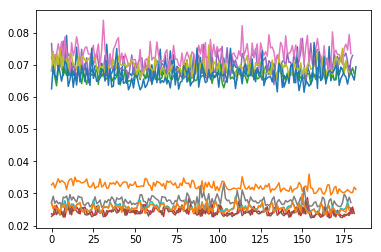

In [402]:
for i in range(6):
    plt.plot([l.history["val_loss"] for l in loss[i]][2500:])
    plt.plot([l.history["loss"] for l in loss[i]][2500:])
plt.show()

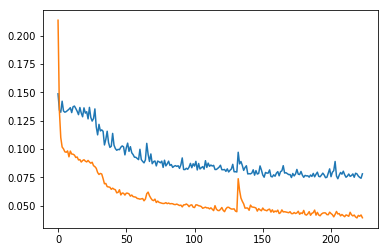

In [370]:
plt.plot([l.history["val_loss"] for l in loss])
plt.plot([l.history["loss"] for l in loss])
plt.show()

In [219]:
rot_mat = cv2.getRotationMatrix2D((64, 64), 45, 1.0)
result = cv2.warpAffine(data, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)

NameError: name 'image' is not defined

9
(360, 128, 128, 3) (360, 128, 128, 2)
19 0.09176782


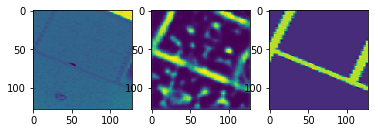

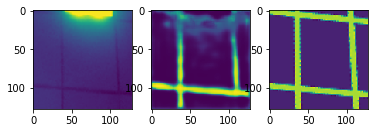

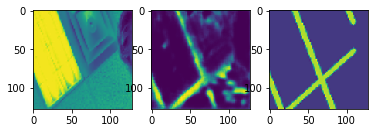

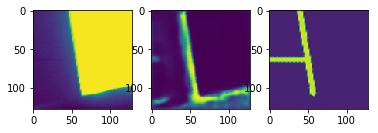

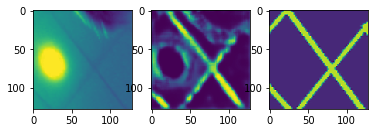

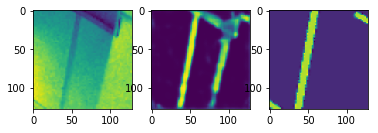

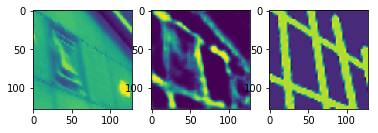

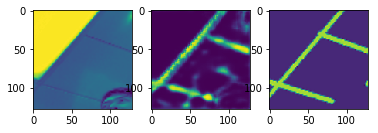

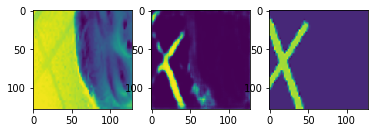

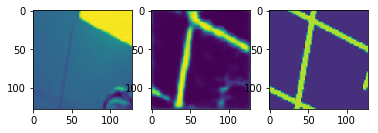

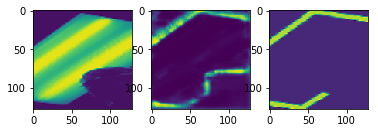

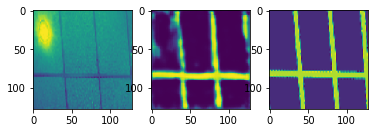

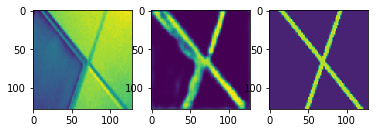

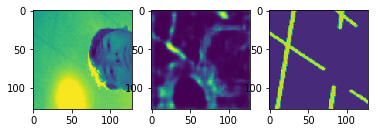

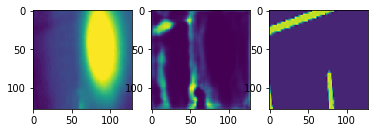

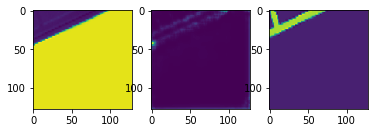

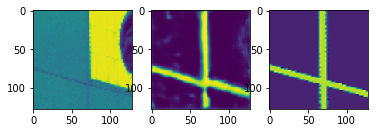

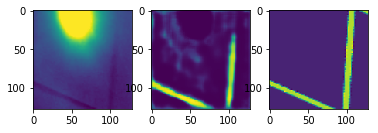

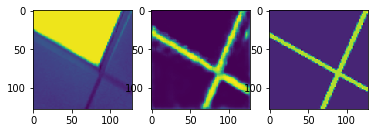

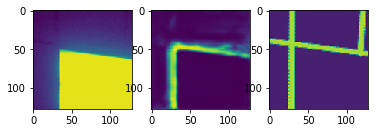

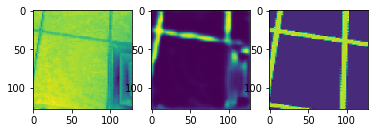

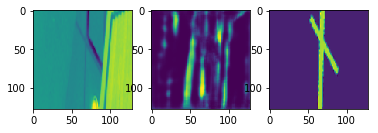

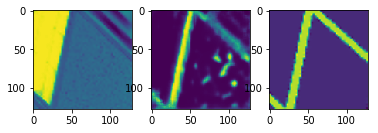

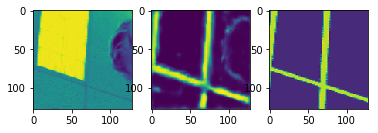

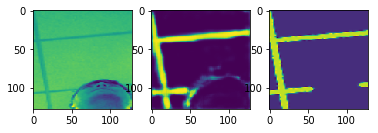

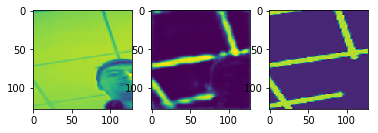

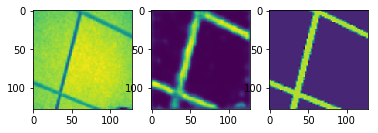

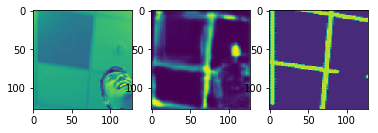

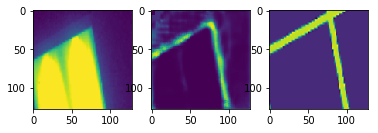

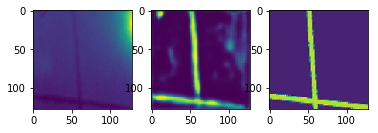

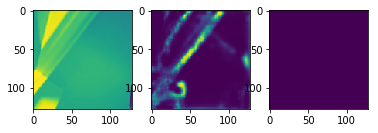

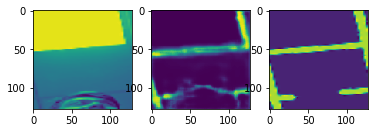

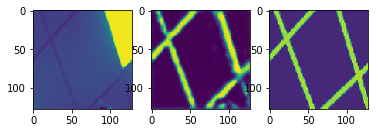

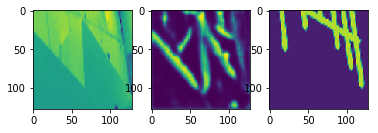

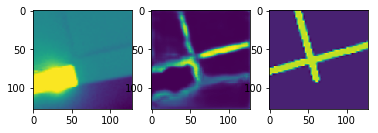

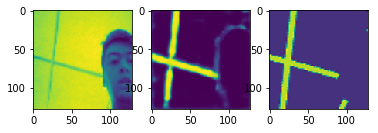

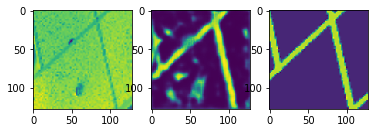

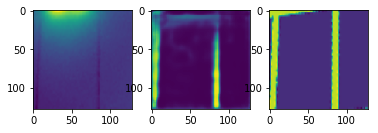

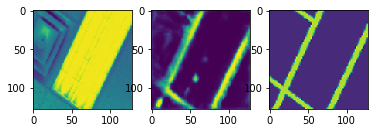

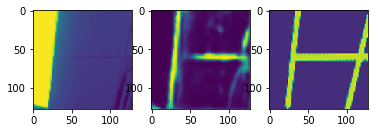

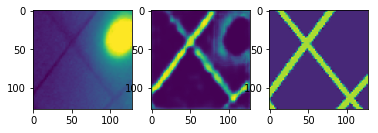

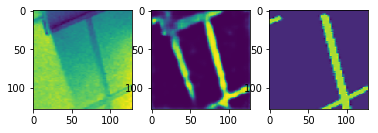

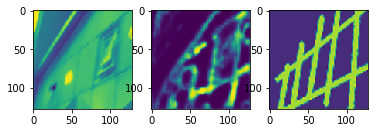

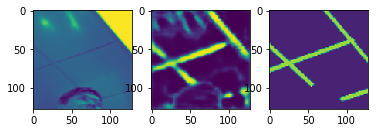

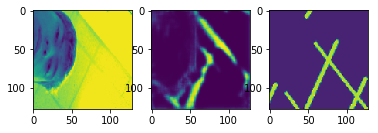

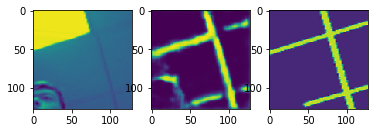

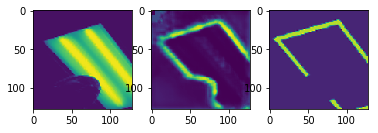

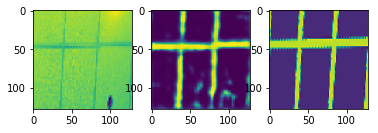

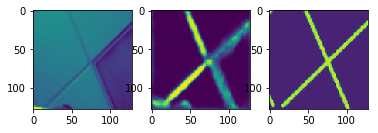

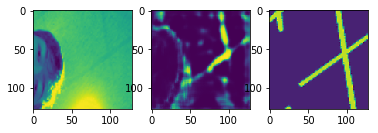

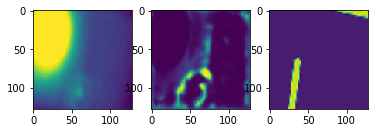

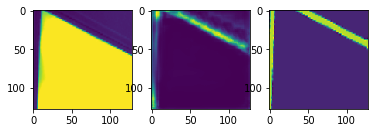

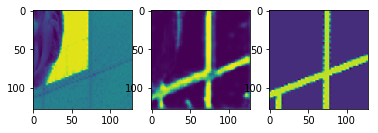

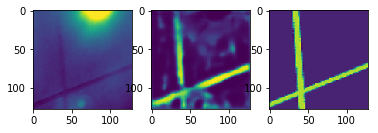

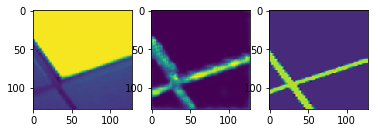

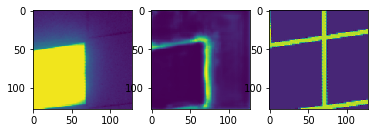

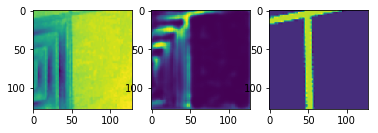

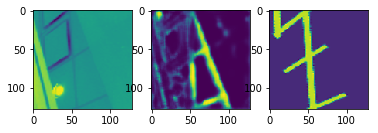

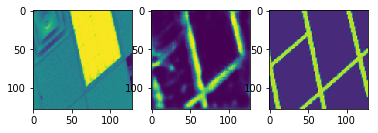

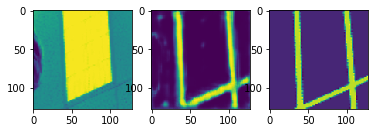

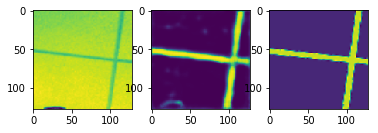

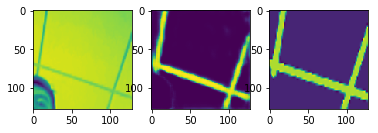

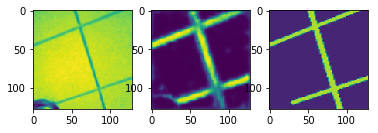

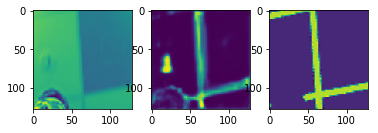

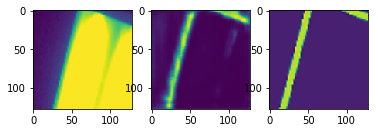

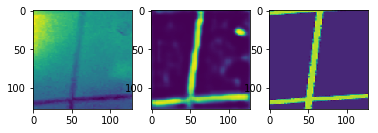

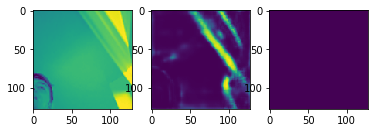

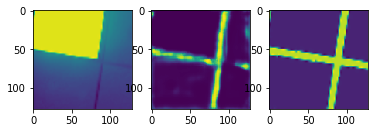

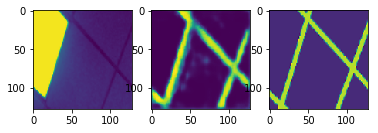

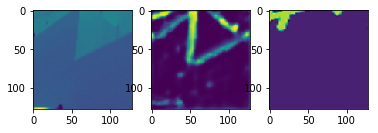

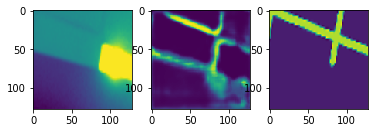

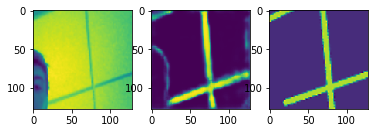

IndexError: index 360 is out of bounds for axis 0 with size 360

In [398]:
#augment by rotation
angle = np.random.randint(360)
print(angle)
batchx = scipy.ndimage.interpolation.rotate(data, angle, (1, 2), False, mode="constant", cval=0)
batchy = scipy.ndimage.interpolation.rotate(y_edge, angle, (1, 2), False, mode="constant", cval=-1)


batchx = np.concatenate([batchx, np.flip(batchx, 2)])
batchy = np.concatenate([batchy, np.flip(batchy, 2)])


offset = np.random.random((len(batchx), 1, 1, 1)) / 4 - .125
scale = np.random.random((len(batchx), 1, 1, 1)) / 2 + .75
batchx = batchx.copy()


batchx = scale * batchx + offset
#batchx = np.concatenate([batchx, -batchx]) / 255.


maxcrop = 90
shape = batchx[0].shape

final_x = []
final_y = []
for i in range(len(batchx)):

    while True:

        x1 = np.random.randint(0, maxcrop)
        x2 = np.random.randint(256 - maxcrop, 256)

        y1 = np.random.randint(0, maxcrop)
        y2 = np.random.randint(256 - maxcrop, 256)



        y_test = batchy[i, x1:x2, y1:y2]

        if not(np.any(y_test == -1)):
            break

    final_x.append(cv2.resize(batchx[i, x1:x2:2, y1:y2:2], (128, 128)))
    final_y.append(cv2.resize(batchy[i, x1:x2:2, y1:y2:2], (128, 128)))


batchx = np.array(final_x)
batchy = np.array(final_y)

batchy = np.expand_dims(batchy, -1)
batchy = np.concatenate([batchy, 1-batchy], -1)

print(batchx.shape, batchy.shape)



print(_, l)
for i in range(0, 400, 5):
    plt.subplot(1, 3, 1)
    plt.imshow(batchx[i, :, :, 0])
    #plt.colorbar()
    plt.subplot(1, 3, 2)
    plt.imshow(models[3].predict(batchx[i:i+ 1]).reshape((-1, patch_size, patch_size, 2))[0, :, :, 0])
    #plt.colorbar()
    plt.subplot(1, 3, 3)
    plt.imshow(batchy.reshape((-1, patch_size, patch_size, 2))[i, :, :, 0])
    
    #plt.colorbar()
    plt.show()

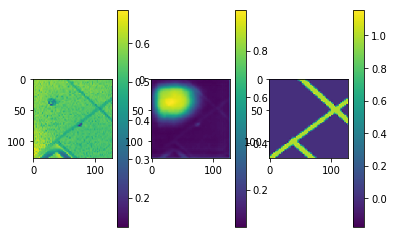

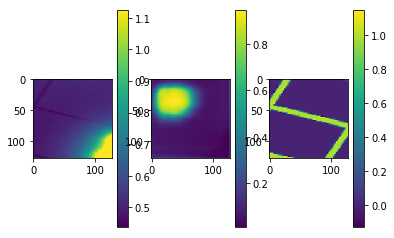

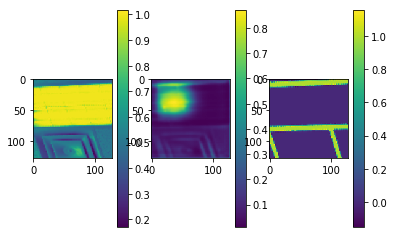

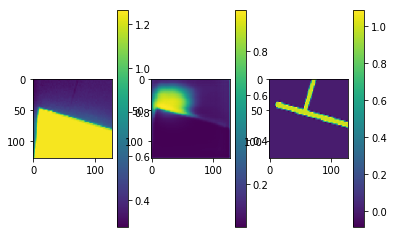

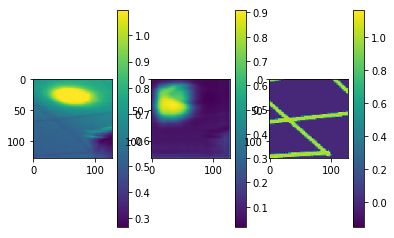

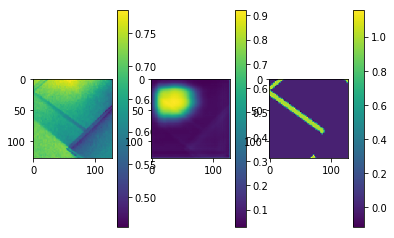

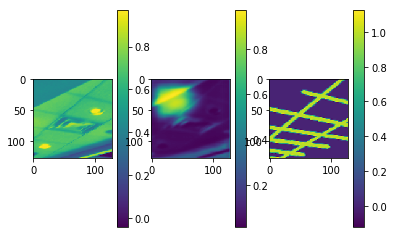

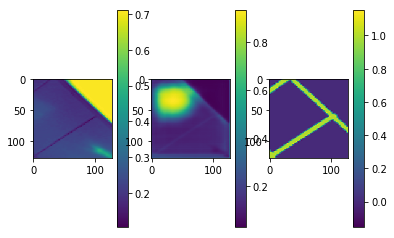

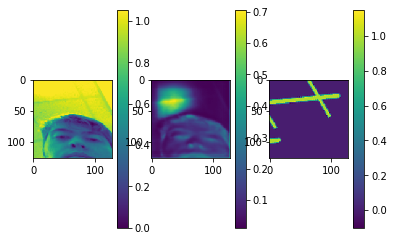

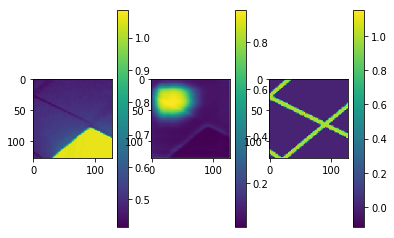

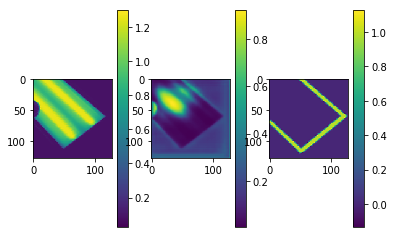

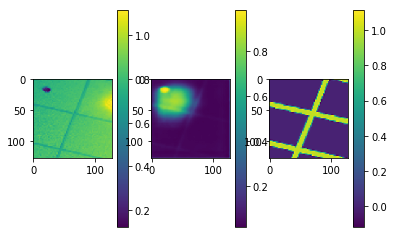

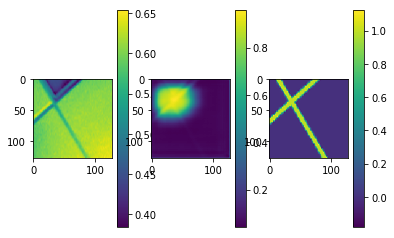

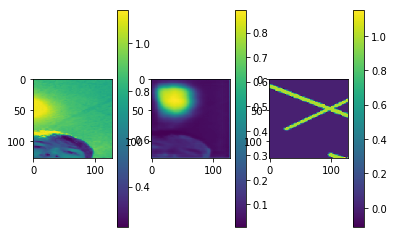

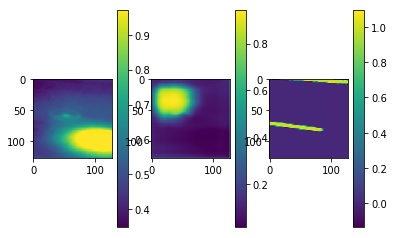

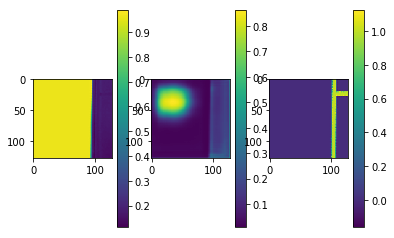

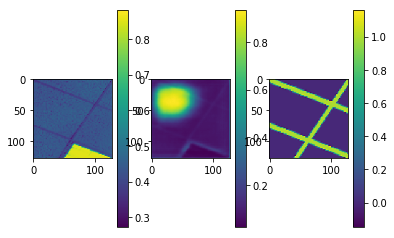

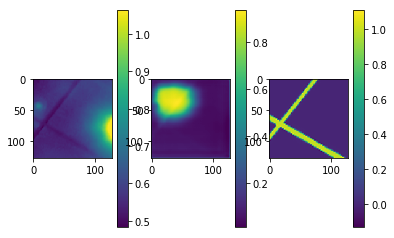

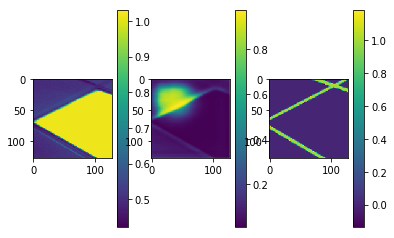

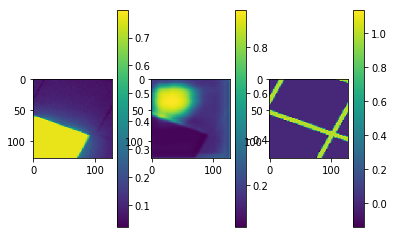

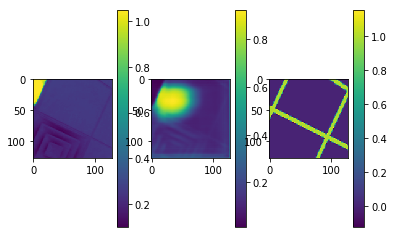

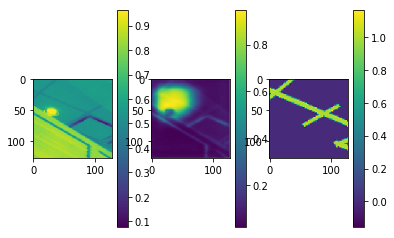

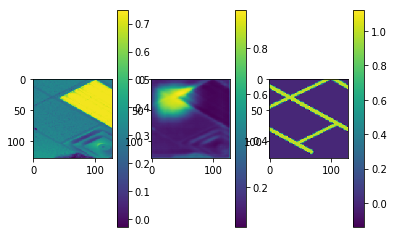

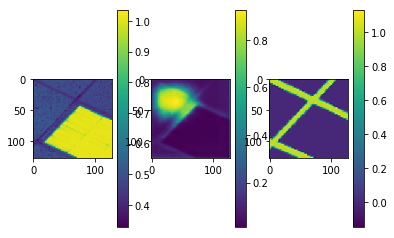

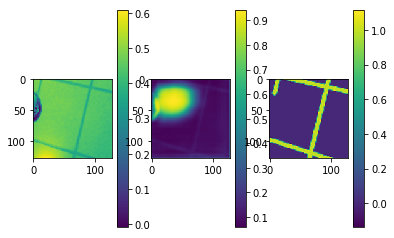

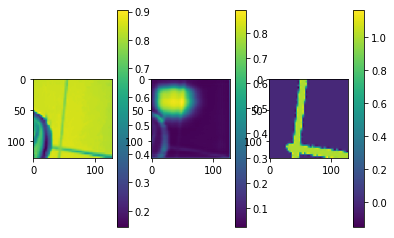

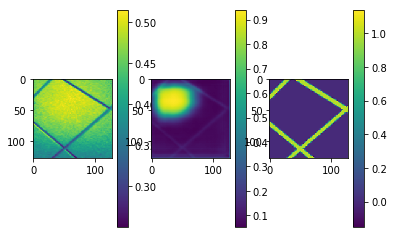

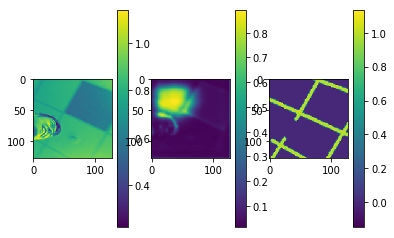

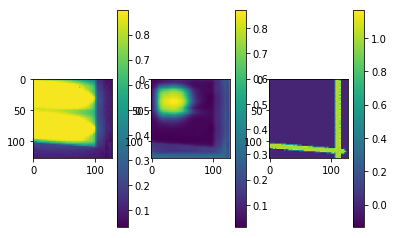

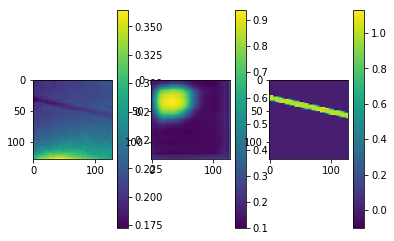

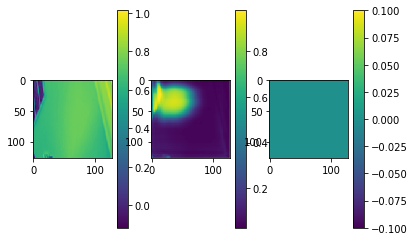

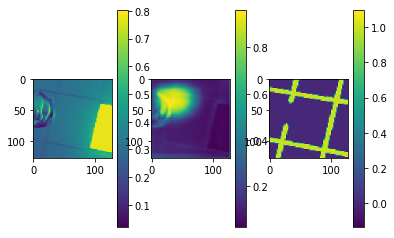

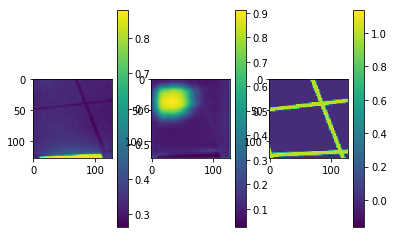

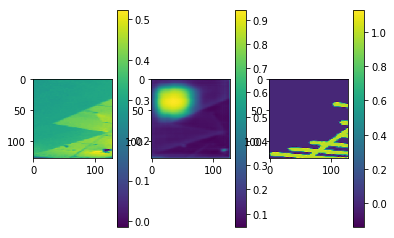

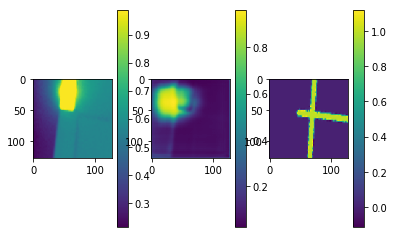

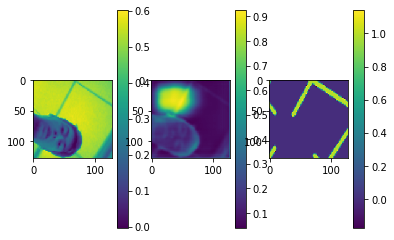

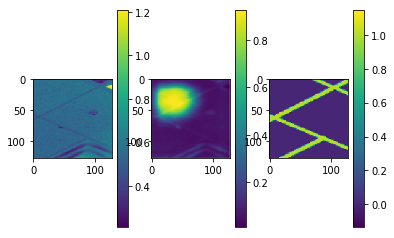

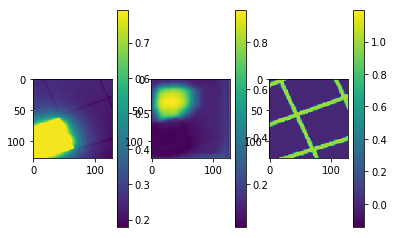

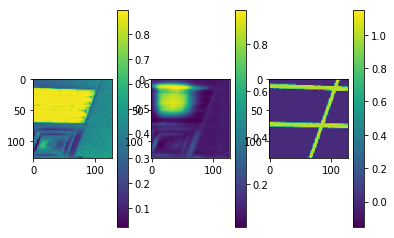

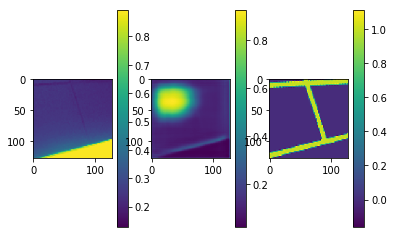

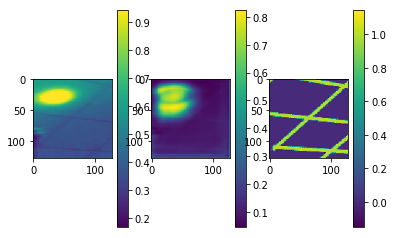

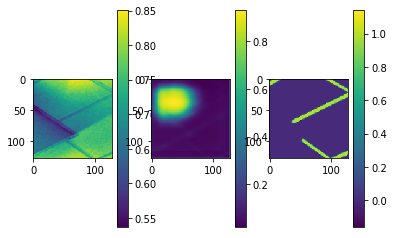

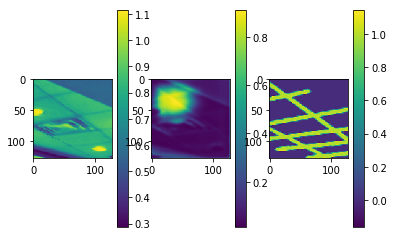

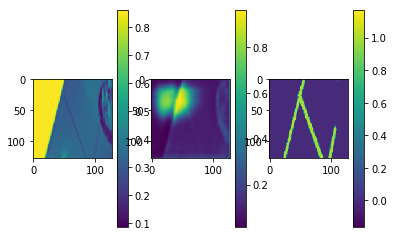

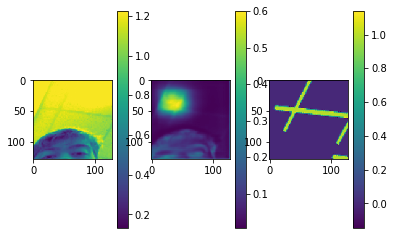

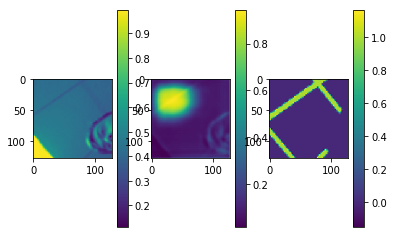

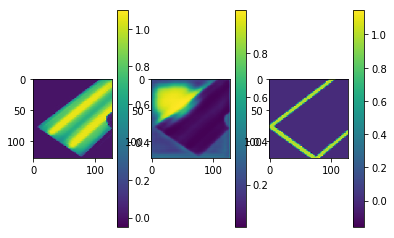

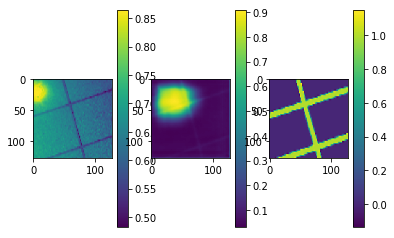

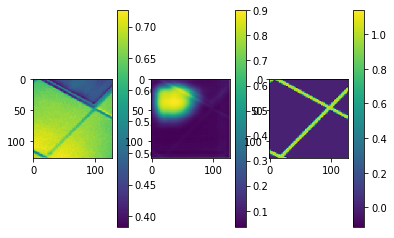

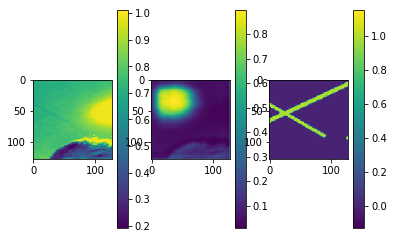

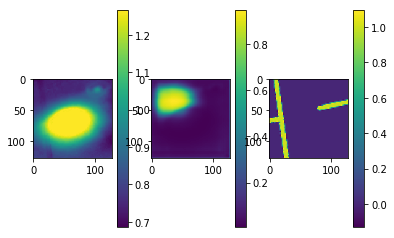

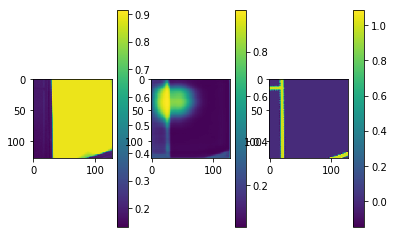

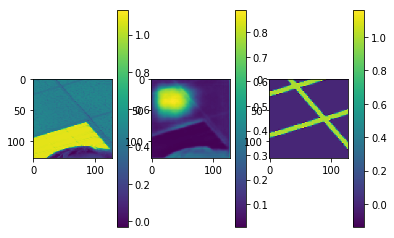

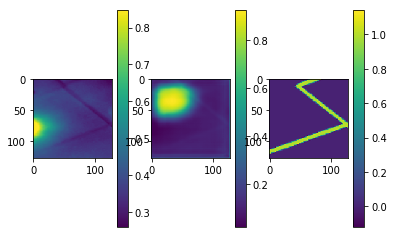

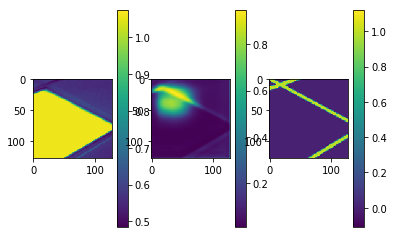

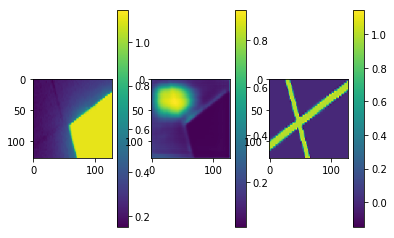

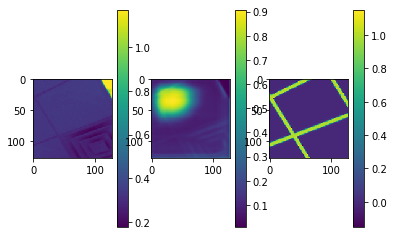

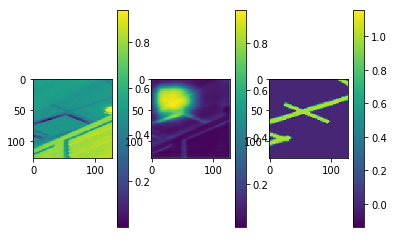

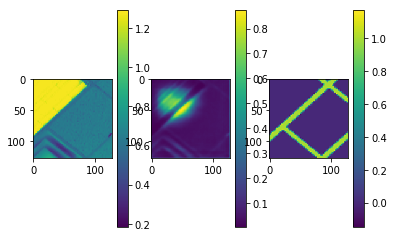

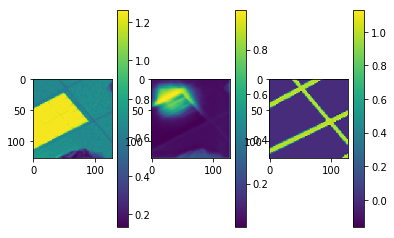

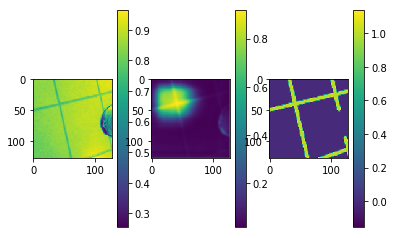

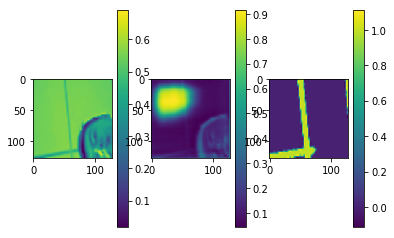

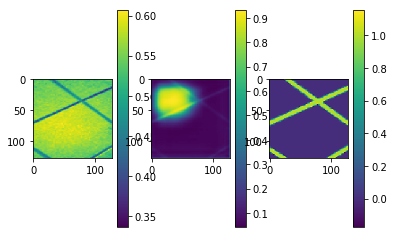

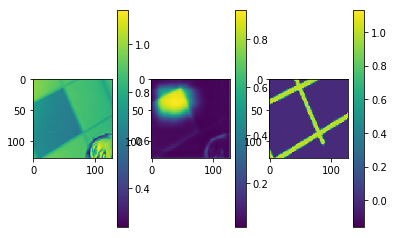

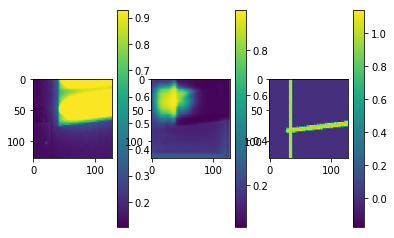

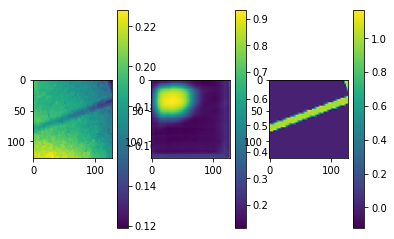

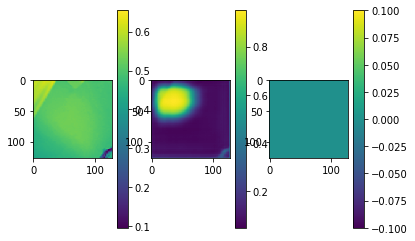

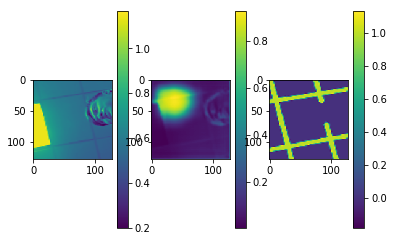

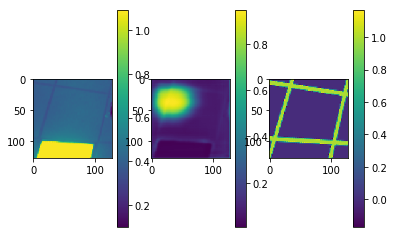

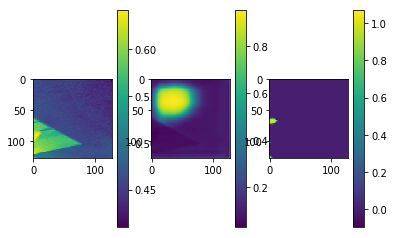

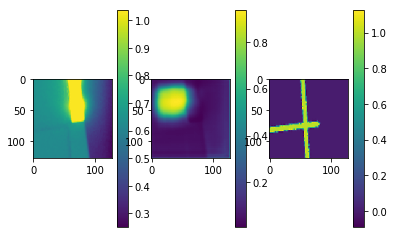

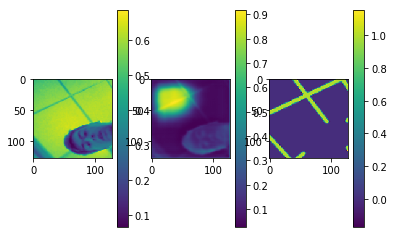

IndexError: index 360 is out of bounds for axis 0 with size 360

In [183]:
for i in range(0, 400, 5):
    plt.subplot(1, 3, 1)
    plt.imshow(batchx[i, :, :, 0])
    plt.colorbar()
    plt.subplot(1, 3, 2)
    plt.imshow(model.predict(batchx[i:i+ 1]).reshape((-1, patch_size, patch_size, 2))[0, :, :, 0])
    plt.colorbar()
    plt.subplot(1, 3, 3)
    plt.imshow(batchy.reshape((-1, patch_size, patch_size, 2))[i, :, :, 0])
    
    plt.colorbar()
    plt.show()

In [209]:
model.test_on_batch(batchx, batchy)

0.1456868

In [210]:
model.loss_functions

[<function keras.losses.mean_squared_error>]

In [82]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = 15, 15

In [366]:
model.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_12 (InputLayer)            (None, 128, 128, 3)   0                                            
____________________________________________________________________________________________________
conv2d_154 (Conv2D)              (None, 64, 64, 5)     380         input_12[0][0]                   
____________________________________________________________________________________________________
conv2d_155 (Conv2D)              (None, 32, 32, 10)    460         conv2d_154[0][0]                 
____________________________________________________________________________________________________
conv2d_156 (Conv2D)              (None, 16, 16, 21)    1911        conv2d_155[0][0]                 
___________________________________________________________________________________________

In [4]:
plt.imshow(np.all(classes[6] == np.array([[[36, 28, 237]]]), axis=2))
plt.show()

c:\users\hasti\anaconda3\envs\neuralnets\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


AxisError: axis 2 is out of bounds for array of dimension 0

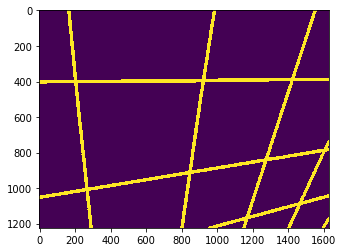

In [12]:
plt.imshow(y_edge[12])
plt.show()

In [66]:
%matplotlib inline

In [67]:
pictures2 = [cv2.imread("allframes/"+name)[::2, ::2] for name in os.listdir("allframes")[::7]]

In [84]:
for i in range(len(pictures2)):
    plt.subplot()
    plt.imshow(model.predict(np.expand_dims(pictures2[i] / 255., 0)[:128,1000:1128])[0].reshape((128, 128, 2))[:, :, 0])
    plt.colorbar()
    plt.show()
    plt.imshow(pictures2[i][1000:1128, :128])
    plt.show()

ValueError: Error when checking : expected input_1 to have shape (None, 128, 128, 3) but got array with shape (1, 0, 432, 3)

In [4]:
test = cv2.imread("test/IMG_0980.JPG")
test = test[::4, ::4]

In [672]:
test

array([[[ 59,  66,  69],
        [ 62,  69,  72],
        [ 65,  72,  75],
        ..., 
        [ 79,  83,  78],
        [ 82,  86,  81],
        [ 85,  89,  84]],

       [[ 62,  69,  72],
        [ 64,  71,  74],
        [ 65,  72,  75],
        ..., 
        [ 82,  86,  81],
        [ 84,  88,  83],
        [ 87,  91,  86]],

       [[ 71,  78,  81],
        [ 67,  74,  77],
        [ 63,  70,  73],
        ..., 
        [ 84,  88,  83],
        [ 85,  89,  84],
        [ 87,  91,  86]],

       ..., 
       [[105, 113, 120],
        [106, 114, 121],
        [106, 114, 121],
        ..., 
        [143, 146, 160],
        [143, 146, 160],
        [142, 145, 159]],

       [[103, 111, 118],
        [103, 111, 118],
        [102, 110, 117],
        ..., 
        [143, 146, 160],
        [143, 146, 160],
        [142, 145, 159]],

       [[102, 110, 117],
        [103, 111, 118],
        [100, 108, 115],
        ..., 
        [143, 146, 160],
        [143, 146, 160],
        [143, 146,

In [5]:
pictures2 = [test[::7, ::7]]

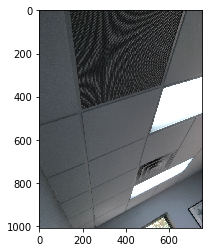

In [6]:
plt.imshow(test)
plt.show()

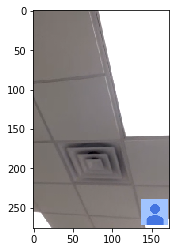

too many
(15,)


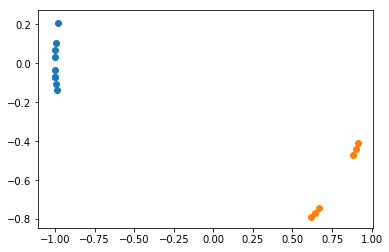

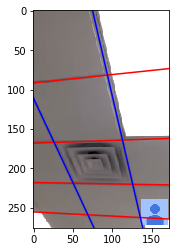

In [124]:
def process(test, liveCV=False, graph=False):
    img = np.array(segment3(test, graph=graph))
    gray = img
    if liveCV:
        cv2.imshow('nn',img)
    #edges = np.logical_or(img[2:, 1:-1] != img[:-2, 1:-1],  img[1:-1, :-2] != img[1:-1, 2:])
    from skimage import img_as_bool, io, color, morphology
    import matplotlib.pyplot as plt

    edges = morphology.skeletonize(img)
    if graph:
        plt.imshow(edges)
        plt.show()
    edges = edges.astype(np.uint8)

    img = np.array(test)

    lines = cv2.HoughLines(edges,1,np.pi/180,40)
    if lines is not None and len(lines) > 25:
        lines = cv2.HoughLines(edges,1,np.pi/180,50)
        print("too many")
    
    return lines

def cvShow(lines, img):
    
    if lines is not None and len(lines.shape) == 3:
        print(lines.shape)
        for rho,theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 2000*(-b))
            y1 = int(y0 + 2000*(a))
            x2 = int(x0 - 2000*(-b))
            y2 = int(y0 - 2000*(a))

            cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    
    cv2.imshow('nn',img)
    return img
        
def segment3(line, graph=True):
    inp = line
    offset = (patch_size - 100) // 2
    line = np.pad(line, ((offset, offset + patch_size //2 + 100),
                         (offset, offset + patch_size //2 + 100),
                         (0, 0)), "reflect")
    shape = line.shape
    
    i_grid, j_grid = np.mgrid[0:shape[0] - patch_size:128, 0:shape[1]-patch_size:128]
    
    B_shape = i_grid.shape
    
    i_grid = i_grid.flatten()
    j_grid = j_grid.flatten()
    blbatch = np.array([
        line[ci:ci + patch_size, cj:cj + patch_size] for ci, cj in zip(i_grid, j_grid)
    ])
    
    
    res = model.predict(blbatch)
    #classes = res[:, :, 0]
    classes = np.argmax(res, -1)
    classes = classes.reshape((B_shape[0] * B_shape[1], 128, 128))
    
    result = np.zeros(line.shape[:-1])
    
    for i, j, block in zip(i_grid, j_grid, classes):
        offset = (patch_size - 100) // 2
        result[i:i + patch_size, j:j + patch_size] = block
    
    
    result = result[offset:offset + inp.shape[0], offset:offset + inp.shape[1]]
    if graph:
        #relevantRegion = line[ patch_size // 4:np.max(i_grid) + patch_size * 3 // 4, patch_size //4 :np.max(j_grid) + patch_size* 3 // 4]
        plt.imshow(inp , cmap="gray")
        #plt.show()
        plt.imshow(result, alpha=.5)
    
        plt.show()
        print(result.shape, line.shape)
        #plt.show()
        
    return result

def lineFromRhoTheta(rt):
    x = []
    y = []

    if lines is not None:
        for rho,theta in rt[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = (x0 + 800*(-b))
            y1 = (y0 + 800*(a))
            x2 = (x0 - 800*(-b))
            y2 = (y0 - 800*(a))
            x.append([x1, x2])
            y.append([y1, y2])
            
    x = np.array(x)
    y = np.array(y)
    return x, y

from sklearn.cluster import AffinityPropagation, k_means
from sklearn import mixture
def reduce(lines):
    if lines is not None:
        af = AffinityPropagation(preference=-.01)
        af.fit(lines[:, 0] / np.array([[300, 1]]))

        real_lines = af.cluster_centers_ * np.array([[300, 1]])
        return np.expand_dims(real_lines, 1)
    
    
def split(lines):
    if lines is not None:
        idxs = np.arange(len(lines))
        angles = lines[:, 0, 1] * 2
        vangles = np.array([np.cos(angles), np.sin(angles)]).transpose()

        clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
        clf.fit(vangles)
        label = clf.predict(vangles)
        print(label.shape)
        l1 = lines[label == 0]
        l2 = lines[label == 1]
        plt.scatter(vangles[label == 0, 0], vangles[label == 0, 1])
        plt.scatter(vangles[label == 1, 0], vangles[label == 1, 1])
        plt.show()
        return l1, l2
    return None, None
    
import random
test = random.choice(imgs2)[0]
plt.imshow(test)
plt.show()

dialation = 1
lines = process(test[::dialation, ::dialation], graph=False)

l1, l2 = split(lines)
#for l in l1, l2:
#    plt.scatter(l[:, 0, 0], l[:, 0, 1])
#plt.show()

for l, color in zip([l1, l2], ["red", "blue"]):
    xt, yt = lineFromRhoTheta(reduce(l))
    plt.plot(xt.transpose(), yt.transpose(), c=color)
plt.imshow(test[::dialation, ::dialation])
plt.show()


In [34]:
k_means?

In [125]:
import pickle
pickle.dump(imgs2, open("testdata", "wb"))

too many


AttributeError: module 'numpy' has no attribute 'arrange'

In [509]:
lines

array([[[ 115.        ,    1.86750233]]], dtype=float32)

array([[[ 225.        ,    1.2915436 ]],

       [[  49.        ,    2.37364769]],

       [[ 117.        ,    2.28638124]],

       [[ 264.        ,    1.39626336]],

       [[ 263.        ,    1.41371667]],

       [[  46.        ,    2.39110112]],

       [[ 167.        ,    1.13446403]],

       [[  52.        ,    2.3561945 ]],

       [[  72.        ,    0.92502451]],

       [[ 166.        ,    1.15191734]],

       [[ 120.        ,    2.26892805]],

       [[ 115.        ,    2.30383468]],

       [[  73.        ,    0.89011788]],

       [[ -57.        ,    2.51327419]]], dtype=float32)

In [126]:
run ../getLines.py

OSError: Unable to open file (Unable to open file: name = 'line detector/mediocre_linefinder', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [358]:
plt.plot(loss)
plt.show()

TypeError: float() argument must be a string or a number, not 'History'

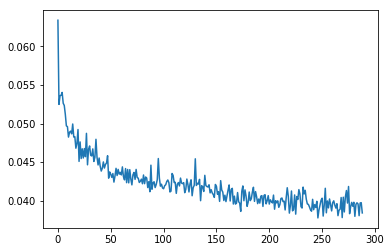

In [36]:
plt.plot(loss)
plt.show()

In [56]:
from PIL import ImageGrab
bb = [1546, 397, 2065, 1223]
while True:
    test = np.array(ImageGrab.grab(bb))
    lines = reduce(process(test[::3, ::3], liveCV=True))
    res = cvShow(lines, test[::3, ::3].copy())
    imgs2.append([test[::3, ::3].copy(), res])
    if cv2.waitKey(1) & 0xFF == ord('q'):
        
        break

In [78]:

imgs2 = []

(5, 1, 2)
(5, 1, 2)
(7, 1, 2)
(7, 1, 2)
too many
(6, 1, 2)
(7, 1, 2)
(7, 1, 2)
(7, 1, 2)
(6, 1, 2)
(7, 1, 2)
(6, 1, 2)
(5, 1, 2)
(6, 1, 2)
(5, 1, 2)
(6, 1, 2)
(6, 1, 2)
(6, 1, 2)
(7, 1, 2)
(6, 1, 2)
(4, 1, 2)
(6, 1, 2)
(3, 1, 2)
(7, 1, 2)
(6, 1, 2)
(3, 1, 2)
(6, 1, 2)
(5, 1, 2)
(5, 1, 2)
(5, 1, 2)
(7, 1, 2)
(4, 1, 2)
(2, 1, 2)
(4, 1, 2)
(2, 1, 2)
(6, 1, 2)
(5, 1, 2)
(5, 1, 2)
(6, 1, 2)
(5, 1, 2)
too many
(8, 1, 2)
too many
(6, 1, 2)
too many
(6, 1, 2)
too many
(6, 1, 2)
too many
(6, 1, 2)
too many
(6, 1, 2)
too many
(6, 1, 2)
too many
(6, 1, 2)
(6, 1, 2)
too many
(6, 1, 2)
too many
(6, 1, 2)
(7, 1, 2)
(6, 1, 2)
(7, 1, 2)
(6, 1, 2)
(6, 1, 2)
(4, 1, 2)
(6, 1, 2)
(6, 1, 2)
(5, 1, 2)
(5, 1, 2)
(4, 1, 2)
(4, 1, 2)
(6, 1, 2)
(7, 1, 2)
(6, 1, 2)
(7, 1, 2)
(6, 1, 2)
(6, 1, 2)
(5, 1, 2)
(6, 1, 2)
(6, 1, 2)
(6, 1, 2)
(6, 1, 2)
(7, 1, 2)
(6, 1, 2)
(8, 1, 2)
(6, 1, 2)
(8, 1, 2)
too many
(5, 1, 2)
(6, 1, 2)
too many
(7, 1, 2)
too many
(6, 1, 2)
(8, 1, 2)
(6, 1, 2)
(5, 1, 2)
(6, 1, 2)
too many
(5, 1

c:\users\hasti\anaconda3\envs\neuralnets\lib\site-packages\sklearn\cluster\affinity_propagation_.py:134: RuntimeWarning: invalid value encountered in subtract
  tmp -= np.sum(tmp, axis=0)
c:\users\hasti\anaconda3\envs\neuralnets\lib\site-packages\sklearn\cluster\affinity_propagation_.py:145: RuntimeWarning: invalid value encountered in greater
  E = (np.diag(A) + np.diag(R)) > 0
c:\users\hasti\anaconda3\envs\neuralnets\lib\site-packages\sklearn\cluster\affinity_propagation_.py:161: RuntimeWarning: invalid value encountered in greater
  I = np.where(np.diag(A + R) > 0)[0]


(2, 1, 2)
(1, 1, 2)
(1, 1, 2)
(6, 1, 2)
(8, 1, 2)
(7, 1, 2)
(6, 1, 2)
(6, 1, 2)
(8, 1, 2)
(7, 1, 2)
(6, 1, 2)
(6, 1, 2)
(7, 1, 2)
(6, 1, 2)
(7, 1, 2)
(7, 1, 2)
(6, 1, 2)
(7, 1, 2)
(7, 1, 2)
(7, 1, 2)
(5, 1, 2)
(7, 1, 2)
(8, 1, 2)
(8, 1, 2)
(6, 1, 2)
(6, 1, 2)
(8, 1, 2)
(7, 1, 2)
(7, 1, 2)
(6, 1, 2)
(7, 1, 2)
(8, 1, 2)
(7, 1, 2)
(7, 1, 2)
(7, 1, 2)
(8, 1, 2)
(7, 1, 2)
(7, 1, 2)
(7, 1, 2)
(7, 1, 2)
(8, 1, 2)
(7, 1, 2)
(7, 1, 2)
(7, 1, 2)
(8, 1, 2)
(4, 1, 2)
(5, 1, 2)
(6, 1, 2)
too many
(7, 1, 2)
too many
(6, 1, 2)
too many
(6, 1, 2)
too many
(5, 1, 2)
too many
(7, 1, 2)
too many
(6, 1, 2)
too many
(6, 1, 2)
(5, 1, 2)
too many
(5, 1, 2)
(5, 1, 2)
too many
(6, 1, 2)
too many
(6, 1, 2)
(7, 1, 2)
(6, 1, 2)
(6, 1, 2)
(5, 1, 2)
(6, 1, 2)
(7, 1, 2)
(8, 1, 2)
too many
(8, 1, 2)
(7, 1, 2)
(6, 1, 2)
(7, 1, 2)
too many
(7, 1, 2)
(7, 1, 2)
(6, 1, 2)
(7, 1, 2)
(6, 1, 2)
(7, 1, 2)
(7, 1, 2)
(7, 1, 2)
(4, 1, 2)
(6, 1, 2)
(4, 1, 2)
(6, 1, 2)
(4, 1, 2)
(4, 1, 2)
(3, 1, 2)
(3, 1, 2)
(2, 1, 2)
(3, 1, 2)
(3

KeyboardInterrupt: 

In [80]:
len(imgs2)

335

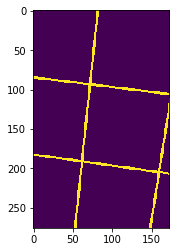

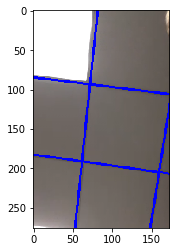

In [555]:
plt.imshow(np.all(imgs[400][1] == np.array([[0, 0, 255]]), axis=2))
plt.show()
plt.imshow(imgs[400][1])
plt.show()

In [564]:
imgs = np.array(imgs)

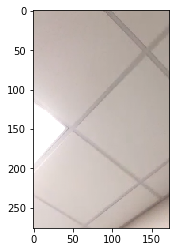

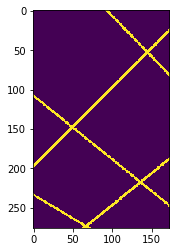

In [704]:

plt.imshow(bdata[0])
plt.show()
plt.imshow(bclasses[0])
plt.show()

In [659]:
loss = []
model = unet(2, True, input_dim=3)
model.compile(rmsprop(), keras.losses.categorical_crossentropy)

(?, 64, 64, 32) (?, 128, 128, 32)
(?, 32, 32, 128) (?, 64, 64, 128)
(?, 16, 16, 256) (?, 32, 32, 256)
(?, 8, 8, 256) (?, 16, 16, 256)
(?, 4, 4, 512) (?, 8, 8, 512)
8 8
16 16
32 32
64 64
128 128
(?, 128, 128, 2)


In [67]:
import scipy

for width in [9, 8, 6, 3, 3,3,3,33, 3, 3, 3, 3, 3, 3]:
    width = 3
    for _ in range(770):
        #y_edge = np.logical_or(y[:, 2:, 1:-1] != y[:, :-2, 1:-1], 0)
        batch = imgs[np.random.choice(range(len(imgs)), 23)]
        data = batch[:, 0] / 255
        classes = np.all(batch[:, 1] == np.array([[0, 0, 255]]), axis=3)
        y_edge = np.array([scipy.ndimage.binary_dilation(y_e, iterations=width) for y_e in classes])
        
        shape = data[0].shape
        cropi = np.random.randint(0, shape[0] - patch_size, len(data))
        cropj = np.random.randint(0, shape[1] - patch_size, len(data))
        batchx = [
            xn[ci:ci + patch_size, cj:cj + patch_size] for xn, ci, cj in zip(data, cropi, cropj)
        ]
        batchy = np.array([
            yn[ci:ci + patch_size, cj:cj + patch_size] for yn, ci, cj in zip(y_edge, cropi, cropj)
        ])
        angle = np.random.randint(360)
        print(angle)
        #batchx = scipy.ndimage.interpolation.rotate(batchx, angle, (1, 2), False, mode="reflect")
        offset = np.random.random(len(batchx)) / 4 - .125
        scale = np.random.random(len(batchx)) / 2 + .75
        batchx = np.reshape(scale, [23, 1, 1, 1]) * batchx + np.reshape(offset, [23, 1, 1, 1])
        batchx = np.concatenate([batchx, np.flip(batchx, 2)])
        #batchx = np.concatenate([batchx, -batchx]) / 255.
        #batchy = scipy.ndimage.interpolation.rotate(batchy, angle, (1, 2), False, mode="reflect", order=0)
        batchy = np.concatenate([batchy, np.flip(batchy, 2)])
        #batchy = np.concatenate([batchy, batchy])
        


        batchy = keras.utils.to_categorical(batchy, num_classes=2)

        batchy = batchy.reshape([len(batchx), patch_size**2, -1])

        l = model.train_on_batch(batchx, batchy)
        loss.append(l)
        print(_, l)

TypeError: only integer scalar arrays can be converted to a scalar index

In [66]:

batch = imgs[np.random.choice(range(len(imgs)), 23)]
data = batch[:, 0] / 255
classes = np.all(batch[:, 1] == np.array([[0, 0, 255]]), axis=3)
y_edge = np.array([scipy.ndimage.binary_dilation(y_e, iterations=width) for y_e in classes])

shape = data[0].shape
cropi = np.random.randint(0, shape[0] - patch_size, len(data))
cropj = np.random.randint(0, shape[1] - patch_size, len(data))
batchx = [
    xn[ci:ci + patch_size, cj:cj + patch_size] for xn, ci, cj in zip(data, cropi, cropj)
]
batchy = np.array([
    yn[ci:ci + patch_size, cj:cj + patch_size] for yn, ci, cj in zip(y_edge, cropi, cropj)
])
angle = np.random.randint(360)
print(angle)
#batchx = scipy.ndimage.interpolation.rotate(batchx, angle, (1, 2), False, mode="reflect")
offset = np.random.random(len(batchx)) / 4 - .125
scale = np.random.random(len(batchx)) / 2 + .75
batchx = np.reshape(scale, [23, 1, 1, 1]) * batchx + np.reshape(offset, [23, 1, 1, 1])
batchx = np.concatenate([batchx, np.flip(batchx, 2)])
#batchx = np.concatenate([batchx, -batchx]) / 255.
#batchy = scipy.ndimage.interpolation.rotate(batchy, angle, (1, 2), False, mode="reflect", order=0)
batchy = np.concatenate([batchy, np.flip(batchy, 2)])
#batchy = np.concatenate([batchy, batchy])



batchy = keras.utils.to_categorical(batchy, num_classes=2)

batchy = batchy.reshape([len(batchx), patch_size**2, -1])

l = model.train_on_batch(batchx, batchy)
loss.append(l)
print(_, l)
print(_, l)
for i in range(0, 64):
    plt.subplot(1, 3, 1)
    plt.imshow(batchx[i, :, :, 0])
    
    plt.subplot(1, 3, 2)
    plt.imshow(model.predict(batchx[i:i+ 1]).reshape((-1, patch_size, patch_size, 2))[0, :, :, 0])
    #plt.colorbar()
    plt.subplot(1, 3, 3)
    plt.imshow(batchy.reshape((-1, patch_size, patch_size, 2))[i, :, :, 0])
    
    #plt.colorbar()
    plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [613]:
patch_size

128

In [65]:
model.save("../web_linefinder")

In [357]:
model.save("../heavy_linefinder")

In [442]:
models[5].save("../light_diverse_linefinder")

In [443]:
umodel = keras.models.load_model("../heavy_linefinder")